<center>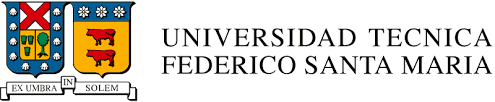</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - 2023-1 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Importación de librías** 


In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt 
import os

import sklearn as sk
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, r2_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import NuSVC


# 1. Regresión lineal para la predicción de la demanda de bicicletas compartidas en Seúl



### 1.1.1 Exploración del conjunto de datos




In [30]:
path_ = os.path.abspath('Tarea_1_INF_398.ipynb')
data_path_ = os.path.join(os.path.dirname(path_), "data\\")

data_path_

'c:\\Users\\Nicolás\\Documents\\GitHub\\Tarea1_INF398\\data\\'

In [31]:
data = pd.read_csv(data_path_+'SeoulBikeData.csv',encoding= 'unicode_escape')
#data = pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')
#data.head(1)
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


- Dado que el dataset incluye el número de bicicletas arrendadas en la determinada hora de un día, se propone hacer un dataframe aparte con los promedios de bicicletas arrendadas diariamente para realizar los análisis cualitativos y cuantitativos de la primera parte de la pregunta 1. De esta forma:

In [32]:
data_prom = pd.DataFrame(columns=["Date","Rented Bike Count","Temperature(°C)","Humidity(%)","Wind speed (m/s)","Visibility (10m)","Dew point temperature(°C)","Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)","Seasons","Holiday","Functioning Day"])

count = 0
add = 0
rent_bike = 0
temp = 0
humid = 0
wind = 0
visib = 0
dew_p = 0
solar = 0
rainfall = 0
snowfall = 0

for i in range(len(data)):
    if count <= 23:
        rent_bike += data.iloc[i]["Rented Bike Count"]
        temp += data.iloc[i]["Temperature(°C)"]
        humid += data.iloc[i]["Humidity(%)"]
        wind += data.iloc[i]["Wind speed (m/s)"]
        visib += data.iloc[i]["Visibility (10m)"]
        dew_p += data.iloc[i]["Dew point temperature(°C)"]
        solar += data.iloc[i]["Solar Radiation (MJ/m2)"]
        rainfall += data.iloc[i]["Rainfall(mm)"]
        snowfall += data.iloc[i]["Snowfall (cm)"]
        seas = data.iloc[i]["Seasons"]
        date = data.iloc[i]["Date"]
        holy = data.iloc[i]["Holiday"]
        func = data.iloc[i]["Functioning Day"]
        count += 1

    else:
        rent_bike_prom = rent_bike/24
        temp_prom = temp/24
        humid_prom = humid/24
        wind_prom = wind/24
        visib_prom = visib/24
        dew_pprom = dew_p/24
        solar_prom = solar/24
        rainfall_prom = rainfall/24
        snowfall_prom = snowfall/24
        data_prom.loc[add] = [date,rent_bike_prom,temp_prom,humid_prom,wind_prom,visib_prom,dew_pprom,solar_prom,rainfall_prom,snowfall_prom,seas,holy,func]
        count = 1
        rent_bike = 0 + data.iloc[i]["Rented Bike Count"]
        temp = 0 + data.iloc[i]["Temperature(°C)"]
        humid = 0 + data.iloc[i]["Humidity(%)"]
        wind = 0 + data.iloc[i]["Wind speed (m/s)"]
        visib = 0 + data.iloc[i]["Visibility (10m)"]
        dew_p = 0 + data.iloc[i]["Dew point temperature(°C)"]
        solar = 0 + data.iloc[i]["Solar Radiation (MJ/m2)"]
        rainfall = 0 + data.iloc[i]["Rainfall(mm)"]
        snowfall = 0 + data.iloc[i]["Snowfall (cm)"]
        seas = data.iloc[i]["Seasons"]
        date = data.iloc[i]["Date"]
        holy = data.iloc[i]["Holiday"]
        func = data.iloc[i]["Functioning Day"]
        add += 1

In [33]:
data_prom.head(3)

,Date,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,397.458333,-2.454167,45.875000,1.5375,1870.750000,-13.545833,0.248750,0.000000,0.0,Winter,No Holiday,Yes
1,02/12/2017,355.125000,1.325000,61.958333,1.7125,1471.083333,-5.716667,0.263750,0.000000,0.0,Winter,No Holiday,Yes
2,03/12/2017,300.916667,4.875000,81.541667,1.6125,455.750000,1.883333,0.125417,0.166667,0.0,Winter,No Holiday,Yes


Explore el conjunto de datos y responda  brevemente las siguiente preguntas:

> a) ¿Cuáles variables poseen valores numéricos y cuáles poseen valores categóricos?

Las variables que poseen valores numéricos, es decir que pueden ser consideradas de forma directa en la regresión lineal son:

- Hour, Temperature, Humidity, Visibility, Solar Radiation y Rainfall.

Por otro lado, en las variabes categóricas se tiene:

- Seasons, Holiday, Functioning Day y Date (sin embargo Date puede ser transformada de forma sencilla en variable númerica separándola en día, año y mes).

> b) ¿Qué aspecto tienen en común las variables _Date_ y _Season_?

Se puede notar que _Date_ y _Season_ son variables íntimamente relacionadas, debido a que cada temporada o estación, está asociada con determinados meses del año que forman parte y están contenidas en la variable _Date_.

> c) Revise si faltan valores en los conjuntos de datos de prueba y de entrenamiento.

In [34]:
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,object,8760,365,0,0.0
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(°C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(°C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0


Al explorar el conjunto de datos y analizar los resultados mostrados en el dataframe anterior, se puede visualizar que todas la features están integramente completas, lo cual se puede visualizar a través de las columnas _NaN\_Values_ y su respectivo porcentaje, que permanece en 0 para todas las categorías.

### 1.1.2 Exploración de Features

> a) Revise detalladamente las variables: 'Date', 'Holiday', 'Seasons' y 'Rented Bike Count' del conjunto de datos cuente y grafique su histograma.

Una vez analizado lo anterior responda las siguientes preguntas:

Haciendo uso del dataframe promedio construido anteriormente y obteniendo el promedio de bicicletas arrendadas (se prefiere visualizar los promedios dado que existen categorias en que una categoría tiene muchos más ejemplos que la otra, por lo que la suma no entregaría un buen indicativo) en las distintas categorías propuestas, se graficaron los histogramas presentados a continuación, los cuales permiten responder de forma directa las siguientes preguntas.

> b) ¿La gente arrienda más bicicletas en vacaciones o en días de trabajo?

A partir del primer histograma es claro que se arriendan más bicicletas en los días de trabajo que en vacaciones. Aproximadamente un 43% más.

> c) ¿Se arriendan más bicicletas los fines de semana o durante la semana?

La diferencia entre el número de bicicletas que se arriendan (en promedio por día) durante dias de semana o fines de semana es muy pequeña. A pesar de esto a partir del segundo histograma se puede apreciar que durante la semana se suelen arrendar más bicicletas que el fin de semana, en promedio.

> d) ¿De qué forma afecta el clima al arriendo de bicicletas?

A partir del histograma de las estaciones del año (tercer histograma) se puede tener una idea relativamente clara respecto a la influencia del clima en el arriendo de bicicletas, ya que es apreciable la diferencia existente entre el número de bicicletas arrendadas en invierno y verano, siendo ampliamente superior el número de la estación que presenta un clima agradable y con escasas lluvias.

Para las preguntas b), c) y d) apóyese de los gráficos.




In [35]:
new_data = data_prom[["Date","Rented Bike Count","Seasons","Holiday"]]

dic_season = {'Winter':0,'Summer':0,'Autumn':0,'Spring':0}
dic_holiday = {"Holiday":0,"No Holiday":0}
dic_week = {"Week":0,"Weekend":0}

for i in range(len(new_data)):
    dic_season[new_data.iloc[i]["Seasons"]] += new_data.iloc[i]["Rented Bike Count"]
    dic_holiday[new_data.iloc[i]["Holiday"]] += new_data.iloc[i]["Rented Bike Count"]
    nday = dt.datetime.strptime(new_data.iloc[i]["Date"],"%d/%m/%Y").date().strftime("%A")
    if nday=="Friday" or nday=="Monday" or nday=="Tuesday" or nday=="Wednesday" or nday=="Thursday":
        dic_week["Week"] += new_data.iloc[i]["Rented Bike Count"]
    elif nday=="Saturday" or nday=="Sunday":
        dic_week["Weekend"] += new_data.iloc[i]["Rented Bike Count"]

In [36]:
dic_week["Week"] = dic_week["Week"]/(5/7*len(data_prom))
dic_week["Weekend"] = dic_week["Weekend"]/(2/7*len(data_prom))
print(dic_week)

dic_holiday["Holiday"] = dic_holiday["Holiday"]/(len(data_prom[data_prom['Holiday']=="Holiday"]))
dic_holiday["No Holiday"] = dic_holiday["No Holiday"]/(len(data_prom[data_prom['Holiday']=="No Holiday"]))
print(dic_holiday)

{'Week': 719.6043269230775, 'Weekend': 667.3421474358977}
{'Holiday': 499.75694444444446, 'No Holiday': 715.3326107899811}


<function matplotlib.pyplot.show(close=None, block=None)>

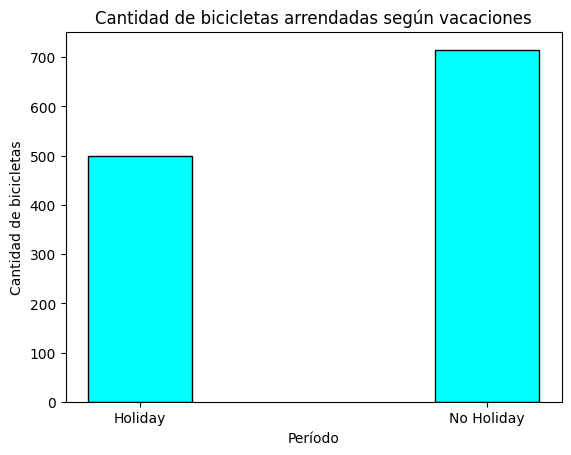

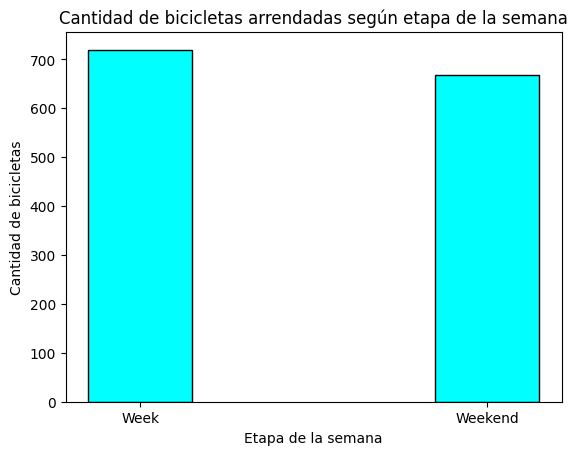

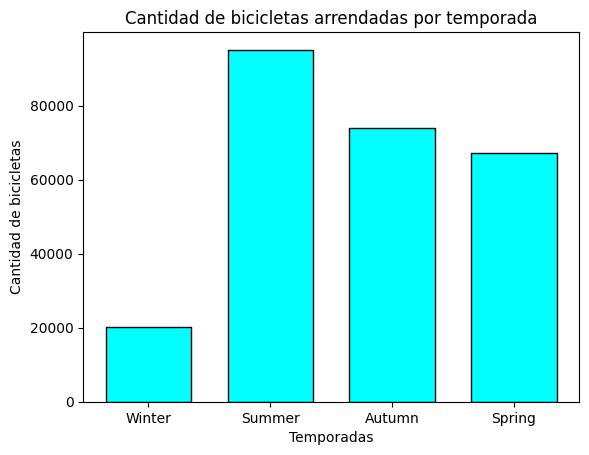

In [37]:
fig1 = plt.figure()
x1 = list(dic_holiday.keys())
y1 = list(dic_holiday.values())
plt.bar(x1, y1, color='cyan',width=0.3, edgecolor='black', linewidth=1)
plt.title("Cantidad de bicicletas arrendadas según vacaciones")
plt.xlabel("Período")
plt.ylabel("Cantidad de bicicletas")
plt.show

fig2 = plt.figure()
x2 = list(dic_week.keys())
y2 = list(dic_week.values())
plt.bar(x2, y2, color='cyan',width=0.3, edgecolor='black', linewidth=1)
plt.title("Cantidad de bicicletas arrendadas según etapa de la semana")
plt.xlabel("Etapa de la semana")
plt.ylabel("Cantidad de bicicletas")
plt.show

fig3 = plt.figure()
x3 = list(dic_season.keys())
y3 = list(dic_season.values())
plt.bar(x3, y3, color='cyan',width=0.7, edgecolor='black', linewidth=1)
plt.title("Cantidad de bicicletas arrendadas por temporada")
plt.xlabel("Temporadas")
plt.ylabel("Cantidad de bicicletas")
plt.show


> e) Grafique el promedio de bicicletas arrendadas por estación ('Seasons').

Corresponde al histograma inmediante superior (tercer histograma) de los recién expuestos.

Responda las siguientes preguntas:

> f) ¿Cuáles son las estaciones en las que más se arriendan bicicletas?

A partir del histograma es claro que la estación en la que se arriendan más bicicletas es en verano, seguido por otoño, primavera y con una frecuencia mucho menor, invierno.

> g) Transforme la fecha en variables numéricas, es decir, si _Date_ es 01/12/2017, entonces obtenga _Año_=2017, _mes_=12, _día_=1. Agreguelas al dataframe.

In [38]:
data_modif = pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')
data_modif['Date'] = pd.to_datetime(data_modif['Date'], format='%d/%m/%Y')

data_modif['Year'] = data_modif['Date'].dt.year
data_modif['Month'] = data_modif['Date'].dt.month
data_modif['Day of week'] = data_modif['Date'].dt.weekday


data_modif.drop('Date', axis=1, inplace=True)

data_modif.head(300)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day of week
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,310,7,-11.7,53,1.6,1998,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,2
296,591,8,-11.4,47,3.3,2000,-20.4,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,2
297,340,9,-11.1,46,3.4,1981,-20.4,0.10,0.0,0.0,Winter,No Holiday,Yes,2017,12,2
298,202,10,-9.5,39,2.1,1875,-20.9,0.60,0.0,0.0,Winter,No Holiday,Yes,2017,12,2


> h) Grafique y analice de forma general la correlación entre las variables **numéricas**. 

C:\Users\Nicolás\AppData\Local\Temp\ipykernel_37084\1554625057.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr= data_modif.corr()


<Axes: >

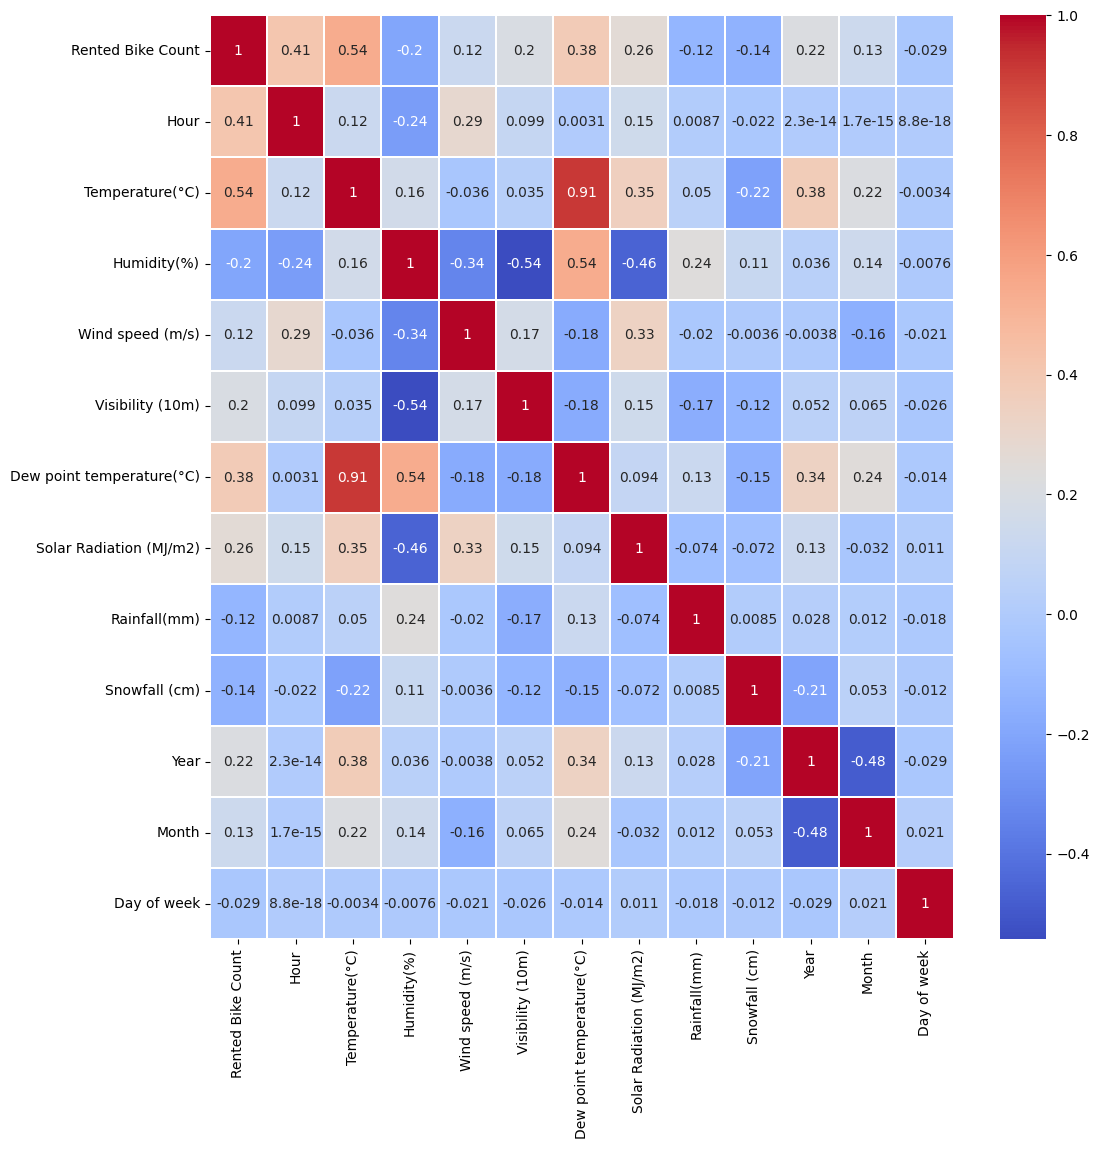

In [39]:
data_corr= data_modif.corr()       
plt.figure(figsize=(12,12))

sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

Analizando los resultados de gráfico de correlación entre las variables numéricas se puede apreciar que no son muchas las dependencias o correlaciones existentes, sin embargo hay algunas evidentes que hacen bastante sentido, tales como:

- Temperature y Dew point temperature tienen un coeficiente de correlación de 0.91 entre ellas, lo cual quiere decir que están intimamente relacionadas, por lo que la presencia de ambas en el dataset podría considerarse incluso redundante.

- Rented Bike Count que es el target, la variable que se desea predecir, tiene coeficientes de correlación relativamente altos con dos variables numéricas, estas son Temperature (0.54) y Hour (0.41), lo cual puede indicar a priori que estas dos son dentro de las variables numéricas, las más determinantes de la cantidad de bicicletas arrendadas.

> i) Escriba sus conclusiones sobre los resultados encontrados en la correlación en la pregunta h).

En sintonía con lo recién descrito es importante notar que:

- El alto coeficiente de correlación existente entre las features _Temperature_ y _Dew point temperature_ puede indicar cierta redundancia de la presencia de ambas en el dataset, siendo factible por ejemplo dejar aquella que esté más relacionada con la cantidad de bicicletas arrendadas (que en este caso es la categoría _Temperature_).

- Los coeficientes de correlación de las distintas categorias con la variable _Rented Bike Count_ pueden indicar que tan importantes son en la predicción. Aquí destaca la alta relación de las categorías temperatura y hora del día, mientras que en el extremo opuesto se puede rescatar la baja influencia del día de la semana en la cantidad de bicicletas arrendadas, lo cual se confirma también con la ínfima diferencia entre el promedio de bicicletas arrendadas en día de semana o fin de semana.

### 1.1.3 Separación de conjuntos

> a) Divida el dataset en features _X_ y target _y_, además divida el dataset en un subconjunto de entrenamiento y otro de prueba.

In [40]:
X = data_modif.drop('Rented Bike Count',axis=1)
y = data_modif['Rented Bike Count'].values.reshape(-1,1)

La división del conjunto datos en _train_ y _test_ debe ser lo más representativa posible, para que así el modelo pueda ser bien entrenado y por otro lado, puesta a prueba su capacidad de generalización de forma correcta. Por esta razón es que dentro de la función _train\_test\_split_ se hizo uso del stratify que logra lo recién descrito. Aplicarlo de forma directa en el target no fue posible ya que al ser una categoría numérica, hay una amplia gama de valores posibles provocando que se produzca un error al existir valores únicos no separables en los dos conjuntos. 

La solución que nuestro grupo tomó fue aplicar el parámetro stratify a algunas variables categóricas relevantes en la cantidad de bicicletas arrendadas (lo cual fue determinado a partir de los análisis anteriores. Estas fueron _Functioning Day_, _Hour_ y _Seasons_.

Del histograma mostrado a continuación de la separación de conjuntos se puede apreciar que se logró el objetivo, ya que los target se mantienen equilibrados (siguen la misma distibución) en el _train_ y _test_ set.

(array([760., 335., 238., 174., 104.,  73.,  54.,   7.,   5.,   2.]),
 array([   0. ,  355.6,  711.2, 1066.8, 1422.4, 1778. , 2133.6, 2489.2,
        2844.8, 3200.4, 3556. ]),
 <BarContainer object of 10 artists>)

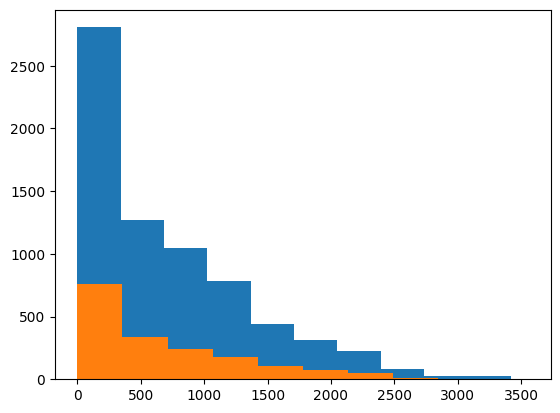

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X[['Functioning Day','Hour','Seasons']],  random_state=42)

plt.hist(y_train)
plt.hist(y_test)

> a) ¿Para qué es el parámetro stratify?


El parámetro Stratify es una opción de la función _train_test_split_ que permite que la proporción de los target a estudiar se mantenga igual en los nuevos conjunto de entrenamiento y prueba con respecto a la proporción del conjunto de datos original. Esta función resulta altamente útil cuando el target del conjunto de datos tiene una cantidad significativamente mayor de instancias de una clase que de otra, permitiendo que esa misma situación se de en los nuevos conjuntos (entrenamiento y validación), ya que de no ser así es probable que esos target que están en menor proporción se concentren en uno de los conjuntos, generando muestras poco representativas de los datos originales. 

> b) Aplique Label Encoding a las variables _Seasons_ y _Holiday_ en el conjunto de entrenamiento y responda para qué sirve y como se usa.

In [42]:
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()
X_train["Seasons"] = le1.fit_transform(X_train["Seasons"])
X_train["Holiday"] = le2.fit_transform(X_train["Holiday"])
X_train["Functioning Day"] = le3.fit_transform(X_train["Functioning Day"])


Label Encoding es una técnica de codificación o transformación de variables categóricas a valores númericos, asignando a cada categoría de la variables categórica un número entero único. Esta transformación sirve para poder usar estas variables categóricas en el modelo de regresión lineal y además, al darle la posibilidad al modelo de procesar datos categóricos como entradas numéricas se puede mejorar la capacidad predictiva y de generalización del mismo, además de reducir el costo computacional del procesamiento de datos de tipo categórico.

Para poder aplicar el Label Encoding se hace uso de la librería de pyhton sklearn, en donde a través del comando _fit\_transform_ se transforman todas las categorías de la respectiva variable categórica en valores numéricos.

Es importante mencionar que el Label Encoding también fue aplicado a la variable "Functioning Day", ya que también es una variable categórica que requería ser procesada previo a la regresión.

> c) Aplique la transformación aprendida por el Label Encoder al conjunto de prueba.

In [43]:
X_test["Seasons"] = le1.transform(X_test["Seasons"])
X_test["Holiday"] = le2.transform(X_test["Holiday"])
X_test["Functioning Day"] = le3.transform(X_test["Functioning Day"])

> d) ¿Por qué no se aplica la transformación del Label Encoder directamente sobre el conjunto de datos completo?

La razón por la que no se aplica la transformación directamente sobre el conjunto de datos completos es debido a que los conjuntos _train_ y _test_ deben ser totalmente independientes, no permitiendo que en el preprocesamiento de los datos o entrenamiento exista aprendizaje o conocimiento de las carácterísticas del conjunto de prueba. Un ejemplo claro para esto, es que si en el conjunto de prueba existe una variable categórica no existente en el conjunto de entrenamiento, la transformación la aprendería de igual forma al preprocesar los datos aplicando Label Encoding al conjunto completo de los datos, lo cual podría ser considerado como "trampa" en el proceso de entrenamiento y predicción.


## 1.2 Modelos de Regresión

Primero entrenaremos un regresor lineal con los datos _en bruto_, ya que básicamente se transformaron las variables _Date_, _Seasons_ y _Holiday_ tal que todos los datos se puedan procesar por el regresor.

### 1.2.1 Modelo en bruto

> a) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

In [44]:
reg_bruto = LinearRegression().fit(X_train, y_train)
y_pred_bruto = reg_bruto.predict(X_test)

> b) Obtenga el error cuadrático medio de la predicción sobre los datos del conjunto *X_test*

In [45]:
mse_bruto = mean_squared_error(y_test, y_pred_bruto)
r2_bruto = r2_score(y_test,y_pred_bruto)
print('Error cuadrático medio: ', mse_bruto)
print('Coeficiente de correlación: ',r2_bruto)

Error cuadrático medio:  178517.39176952967
Coeficiente de correlación:  0.5523434929472013


> c) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

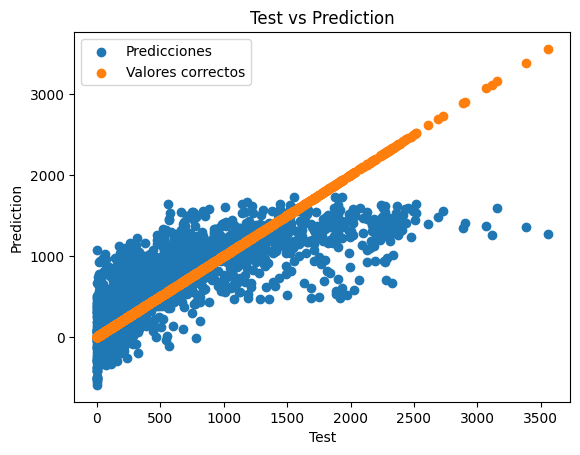

In [46]:
plt.figure()
plt.scatter(y_test, y_pred_bruto, label='Predicciones')
plt.scatter(y_test, y_test, label='Valores correctos')
plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')
plt.legend()


plt.show()

### 1.2.2 Modelo preprocesado

Variables cíclicas

Si aplicaramos variables _Dummy_ o transformar con _One Hot Encoder_ a la fecha terminaríamos con 12 columnas para los meses, 7 columnas para los días de la semana y 24 columnas para la hora! En lugar de eso nos aprovecharemos de que todas estas variables son cíclicas, es decir, después de 23:00 hrs viene 00:00 hrs y el ciclo se vuelve a repetir, lo mismo para los meses del año y los días de la semana. Entonces podemos pensar en este ciclo como si fuera un _circulo_ utilizando el seno y el coseno de la fecha tenemos las coordenada de la fecha en el _circulo_. De esta forma las 23:00 y las 00:00 son cercanas en esta representación. Gracias a lo anterior nos quedamos con solo 2 columnas.

$\text{var\_cos} = \cos(2π\; \text{var}/\text{periodo})$

$\text{var\_sin} = \sin(2π\; \text{var}/\text{periodo})$

> a) ¿Por qué no simplemente usar solo el seno o solo el coseno?

La razón por la que simplemente no usamos solo el seno o coseno, es debido a que queremos ubicar todas las variables cíclicas en un círculo, el cual, para poder ser descrito y recorrido de forma íntegra debemos poder movernos en dos direcciones (x e y en un caso, por ejemplo). Si usamos solo el coseno, podriamos desplazarnos solo en una de las dimensiones del plano, en este caso, en la dirección del eje _x_, perdiendo la información del eje _y_ e impidiendo la representación cíclica que brinda el círculo para las variables categóricas. El análisis análogo para la utilización de sólo el seno.

In [47]:
X_train['Month_sin'] = np.sin(2 * np.pi * X_train['Month'] / 12)
X_train['Month_cos'] = np.cos(2 * np.pi * X_train['Month'] / 12)
X_train['Hour_sin'] = np.sin(2 * np.pi * X_train['Hour'] / 24)
X_train['Hour_cos'] = np.cos(2 * np.pi * X_train['Hour'] / 24)
X_train['Day_sin'] = np.sin(2 * np.pi * X_train['Day of week'] / 7)
X_train['Day_cos'] = np.cos(2 * np.pi * X_train['Day of week'] / 7)

X_test['Month_sin'] = np.sin(2 * np.pi * X_test['Month'] / 12)
X_test['Month_cos'] = np.cos(2 * np.pi * X_test['Month'] / 12)
X_test['Hour_sin'] = np.sin(2 * np.pi * X_test['Hour'] / 24)
X_test['Hour_cos'] = np.cos(2 * np.pi * X_test['Hour'] / 24)
X_test['Day_sin'] = np.sin(2 * np.pi * X_test['Day of week'] / 7)
X_test['Day_cos'] = np.cos(2 * np.pi * X_test['Day of week'] / 7)


X_train.drop(['Month', 'Hour', 'Day of week'], axis=1, inplace=True)
X_test.drop(['Month', 'Hour', 'Day of week'], axis=1, inplace=True)


> b) Aplique la misma lógica de variable _cíclica_ a la variable _Season_.

Antes de aplicar la lógica de la variable cíclica a la variable _Season_ debemos percatarnos que la transformación realizada por el Label Encoding transforma cada una de las categorías en valores numéricos aleatorios, por lo que si transformamos directamente en variable cíclica los resultados del label encoding, no tiene sentido el "ciclo" ya que relacionaría las estaciones de forma aleatoria, siendo que debiese ser:

Winter $\rightarrow$ Spring $\rightarrow$ Summer $\rightarrow$ Autumn

De esta manera, lo primero es ordenar su codificación numérica, esto es:

- Winter $\rightarrow$ 0

- Spring $\rightarrow$ 1

- Summer $\rightarrow$ 2

- Autumn $\rightarrow$ 3

In [48]:
X_train["Seasons"] = le1.inverse_transform(X_train["Seasons"])
X_test["Seasons"] = le1.inverse_transform(X_test["Seasons"])

In [49]:
mapeo = {'Winter': 0, 'Autumn': 3, 'Spring': 1, 'Summer': 2}

X_train["Seasons"] = X_train["Seasons"].map(mapeo)
X_test["Seasons"] = X_test["Seasons"].map(mapeo)

In [50]:
X_train['Sin_Season'] = np.sin(2 * np.pi * X_train['Seasons'] / 4) 
X_train['Cos_Season'] = np.cos(2 * np.pi * X_train['Seasons'] / 4)
X_train.drop('Seasons', axis=1, inplace=True)

In [51]:
X_test['Sin_Season'] = np.sin(2 * np.pi * X_test['Seasons'] / 4)
X_test['Cos_Season'] = np.cos(2 * np.pi * X_test['Seasons'] / 4)
X_test.drop('Seasons', axis=1, inplace=True)

Ahora para verificar que se hayan realizado los cambios deseados:

In [52]:
X_train.head(1)

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Year,Month_sin,Month_cos,Hour_sin,Hour_cos,Day_sin,Day_cos,Sin_Season,Cos_Season
4959,32.7,31,1.7,1243,13.3,2.3,0.0,0.0,1,1,2018,1.224647e-16,-1.0,-0.707107,-0.707107,0.0,1.0,1.224647e-16,-1.0


Normalización de variables.

> c) Transforme las variables para que estas sigan una distribución normal con media 0 y varianza 1.



In [53]:
X_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()


cols_to_normalize = ['Temperature(°C)', 
                     'Humidity(%)', 
                     'Wind speed (m/s)', 
                     'Visibility (10m)', 
                     'Dew point temperature(°C)', 
                     'Solar Radiation (MJ/m2)',	
                     'Rainfall(mm)',	
                     'Snowfall (cm)',
                     'Year']

X_train[cols_to_normalize] = X_scaler.fit_transform(X_train[cols_to_normalize])
y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))

X_test[cols_to_normalize] = X_scaler.transform(X_test[cols_to_normalize])

> d) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

In [54]:
reg_varciclicas = LinearRegression().fit(X_train, y_train)
y_pred_varciclicas = reg_varciclicas.predict(X_test)

> e) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [55]:
y_pred_varciclicas = y_scaler.inverse_transform(y_pred_varciclicas)



> f) Calcule el error cuadrático medio en la escala original de bicicletas

In [56]:
mse_varciclicas = mean_squared_error(y_test, y_pred_varciclicas)
r2_varciclicas = r2_score(y_test,y_pred_varciclicas)

print('Error cuadrático medio: ', mse_varciclicas)
print('Coeficiente de correlación lineal: ', r2_varciclicas)

Error cuadrático medio:  185178.26435738898
Coeficiente de correlación lineal:  0.5356404539488813


> g) ¿Mejoran los resultados con respecto al modelo entrenado sobre los datos en bruto?

Los resultados no mejoran respecto a los obtenidos en el modelo bruto, el MSE es más alto que en el caso anterior y el coeficiente de correlación lineal (R$^2$) es menor. Sin embargo, las variaciones son demasiado grandes, lo que podría dar luces y explicarse, poe ejemplo, en el altísimo error cuadrático medio obtenido en ambos casos, ya que se está buscando ajustar el conjunto de datos a través de un hiperplano, es decir, a través de un modelo en extremo sencillo y básico, lo cual no garantiza en ningún caso que el modelo sea idóneo para los datos estudiados. Por ess razón, independiente de los preprocesamientos que se le hagan a los datos, el modelo sencillamente no muestra ofrecer un buen ajuste y desempeño con el conjunto de datos atingente.

> h) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

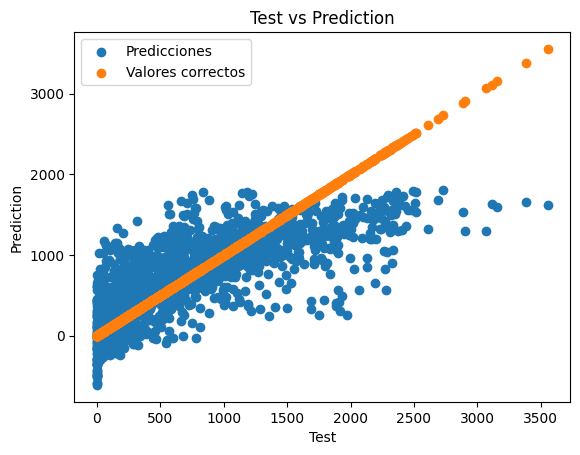

In [57]:
plt.figure()
plt.scatter(y_test, y_pred_varciclicas, label='Predicciones')
plt.scatter(y_test, y_test, label='Valores correctos')
plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')
plt.legend()


plt.show()

### 1.2.3 Modelo SGD

En esta pregunta aplicaremos el modelo de regresión lineal utilizando el gradiente descendente estocástico (SGD), y para visualizar su rendimiento observaremos el error cuadrático medio a medida que el algoritmo SGD va iterando a través de las _epochs_. Para ello necesitamos separar una porción del conjunto de entrenamiento y así obtener el error de validación del modelo en ejemplos que no ha visto.

> a) Separe el conjunto de entrenamiento en un subconjunto de entrenamiento y uno de validación.

In [58]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25)

Utilize la librería _sklearn_ para entrenar el modelo a través _SGDRegressor_ y responda las siguientes preguntas:

> b) ¿Para qué sirve cada uno de los parametros que acepta _SGDRegressor_? Describa brevemente cada uno.

Dentro de los parámetros que acepta la función _SGDRegressor_ se tiene:

- _loss_ : Corresponde a la función de pérdida a utilizar teniendo como valor por defecto "squared_loss" que es el la penalización por la diferencia cuadrática media.

- _penalty_: Término asociado al tipo de regularización a utilizar, sus posibles valores son $\ell_1$, $\ell_2$ y _elasticnet_ que es una combinación de ambas.

- _alpha_: Constante que multiplica y penaliza a la función de pérdida durante el entrenamiento del modelo.

- _learning\_rate_: La tasa de aprendizaje controla el tamaño del paso que se da en cada iteración del gradiente descendente estocástico a través del ajuste del hiperparámetro _alpha_. Sus posibles valores son constant, optimal, invscaling y adaptive.

- _eta0_ : Tasa de aprendizaje inicial (por default es 0.01).

- _warm\_start_ : Controla si los pesos de los coeficientes iniciales del modelo deben reutilizarse de la iteración anterior o comenzar desde cero.

- _max_iter_ : Establece el número máximo de iteraciones permitidas durante el entrenamiento. El modelo se detendrá una vez que se alcance este límite, incluso si no ha convergido. Su valor por defecto es 1000.
- _shuffle_ : Este parámetro que puede tener como valores _True_ y _False_ controla si los datos de entrenamiento se reordenan aleatoriamente antes de cada iteración durante el entrenamiento. Ambas funciones pueden ser útiles según las necesidades del modelo y del conjunto de datos.


> c) Explique cuál es la función del parámetro alpha y compare, teóricamente, las variaciones de implementación del parámetro disponibles en el módulo, es decir, compare: _constant_ vs _optimal_ vs _invscaling_ vs _adaptive_.


Como ya se mencionó recientemente, el parámetro _alpha_ es una constante que otorga un peso a la actualización de cada uno de los coeficientes del modelo, siendo utilizado para controlar la convergencia y evitar el sobreajuste de la regresión lineal. Las diferentes implementaciones son:

- Constant : Es la más simple, pero puede ser la menos efectiva, ya que _alpha_ se mantiene constante a lo largo de todas las iteraciones del algoritmo lo cual puede ocasionar que nunca se converga a los hiperparámetros que minimizan la función de pérdida, oscilando al rededor de ellos.

- Optimal : El valor de _alpha_ se ajusta automáticamente de forma de minimizar la función de pérdida. Es costoso computacionalmente y solo sirve en problemas de regresión lineal.
- Invscaling : Con esta configuración _alpha_ disminuye gradualmente a medida que avanza el entrenamiento.

- Adaptive : _alpha_ se ajusta automáticamente según el criterio: si la función de pérdida actual es menor que la anterior, se disminuye el valor de _alpha_. Mientras que si la función de pérdida en la iteración actual supera la de la iteración anterior, se aumenta _alpha_. 


In [59]:
reg1 = SGDRegressor(loss='squared_error', 
                   penalty=None,                    
                   tol=0.001, 
                   shuffle=True,                                                          
                   warm_start=True,
                   learning_rate='optimal')
reg2 = SGDRegressor(loss='squared_error', 
                   penalty=None,                    
                   tol=0.001, 
                   shuffle=True,                                                          
                   warm_start=True,
                   learning_rate='adaptive')
reg3 = SGDRegressor(loss='squared_error', 
                   penalty=None,                    
                   tol=0.001, 
                   shuffle=True,                                                          
                   warm_start=True,
                   learning_rate='constant')
reg4 = SGDRegressor(loss='squared_error', 
                   penalty=None,                    
                   tol=0.001, 
                   shuffle=True,                                                          
                   warm_start=True,
                   learning_rate='invscaling')

Entrene el regresor SGD por 100 _epochs_ como máximo, utilizando *early_stoping* con una paciencia de 10 _epochs_. Grafique el error cuadrático medio por epoch y responda las siguientes preguntas:

> d) ¿Para qué sirve el *early_stoping*?

El early stopping es una técnica que sirve para evitar el sobreajuste y mejorar la capacidad de generalización de nuestro modelo. Su operación consiste en detener el entrenamiento del modelo de aprendizaje automático cuando el error sobre el conjunto de validación deja de mejorar o directamente empeora. Con este principio de funcionamiento se evita que el modelo siga ajustándose demasiado al _train set_ y detenga el entrenamiento cuando el modelo alcanza un rendimiento óptimo sobre el conjunto de validación.

> e) ¿Cómo se interpretan los resultados del entrenamiento según las curvas obtenidas?

Las curvas obtenidas muestran el comportamiento del error de entrenamiento y validación a lo largo del ajuste del modelo de regresión. A partir de esto:

-  Si tanto el error de entrenamiento como el de validación disminuyen en medidas relativamente similares, se puede interpretar que el modelo está aprendiendo y generalizando de forma correcta, lo que se traduce en un buen ajuste del modelo.

- Por otro lado, si el error de entrenamiento disminuye mientras que el error de validación lo hace mucho más lento, se estanca o sencillamente sube, es un claro indicio que el modelo ha comenzado a sobreajustar los datos de entrenamiento y está perdiendo capacidad de generalización. 

Esto último recalca la importancia del *early_stopping* ya que permite frenar el entrenamiento cuando se comienza a producir overfitting y seleccionar el modelo óptimo que mejor generaliza.

> f) ¿Cuántas _epochs_ duró su entrenamiento?

Para las distintas variaciones de *learning_rate* se logró:

- Constant → 14 _epochs_.

- Optimal → 28 _epochs_.
- Invscaling → 43 _epochs_.

- Adaptive → 16 _epochs_.



In [60]:
reg = reg1
y_tr = np.asarray(y_tr).ravel()
y_test = np.asarray(y_test).ravel()

tr_errors_1, val_errors_1 = [], []

# train the model using early stopping
n_epochs = 100
best_val_error = float('inf')
patience = 10  # stop tring if validation error doesn't improve after 10 epochs
epoch_since_best = 0
for epoch in range(n_epochs):
    reg.partial_fit(X_tr, y_tr)
    
    # collect the train and validation errors after each epoch
    y_tr_pred = reg.predict(X_tr)
    y_val_pred = reg.predict(X_val)
    tr_error = mean_squared_error(y_tr, y_tr_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    tr_errors_1.append(tr_error)
    val_errors_1.append(val_error)
    
    # check if validation error has improved
    if val_error < best_val_error:
        best_val_error = val_error
        epoch_since_best = 0
    else:
        epoch_since_best += 1
        if epoch_since_best >= patience:
            print(f"Stopping training after {epoch+1} epochs")
            break    

reg = reg2
y_tr = np.asarray(y_tr).ravel()
y_test = np.asarray(y_test).ravel()

tr_errors_2, val_errors_2 = [], []

# train the model using early stopping
n_epochs = 100
best_val_error = float('inf')
patience = 10  # stop tring if validation error doesn't improve after 10 epochs
epoch_since_best = 0
for epoch in range(n_epochs):
    reg.partial_fit(X_tr, y_tr)
    
    # collect the train and validation errors after each epoch
    y_tr_pred = reg.predict(X_tr)
    y_val_pred = reg.predict(X_val)
    tr_error = mean_squared_error(y_tr, y_tr_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    tr_errors_2.append(tr_error)
    val_errors_2.append(val_error)
    
    # check if validation error has improved
    if val_error < best_val_error:
        best_val_error = val_error
        epoch_since_best = 0
    else:
        epoch_since_best += 1
        if epoch_since_best >= patience:
            print(f"Stopping training after {epoch+1} epochs")
            break    

reg = reg3
y_tr = np.asarray(y_tr).ravel()
y_test = np.asarray(y_test).ravel()

tr_errors_3, val_errors_3 = [], []

# train the model using early stopping
n_epochs = 100
best_val_error = float('inf')
patience = 10  # stop tring if validation error doesn't improve after 10 epochs
epoch_since_best = 0
for epoch in range(n_epochs):
    reg.partial_fit(X_tr, y_tr)
    
    # collect the train and validation errors after each epoch
    y_tr_pred = reg.predict(X_tr)
    y_val_pred = reg.predict(X_val)
    tr_error = mean_squared_error(y_tr, y_tr_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    tr_errors_3.append(tr_error)
    val_errors_3.append(val_error)
    
    # check if validation error has improved
    if val_error < best_val_error:
        best_val_error = val_error
        epoch_since_best = 0
    else:
        epoch_since_best += 1
        if epoch_since_best >= patience:
            print(f"Stopping training after {epoch+1} epochs")
            break    

reg = reg4
y_tr = np.asarray(y_tr).ravel()
y_test = np.asarray(y_test).ravel()

tr_errors_4, val_errors_4 = [], []

# train the model using early stopping
n_epochs = 100
best_val_error = float('inf')
patience = 10  # stop tring if validation error doesn't improve after 10 epochs
epoch_since_best = 0
for epoch in range(n_epochs):
    reg.partial_fit(X_tr, y_tr)
    
    # collect the train and validation errors after each epoch
    y_tr_pred = reg.predict(X_tr)
    y_val_pred = reg.predict(X_val)
    tr_error = mean_squared_error(y_tr, y_tr_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    tr_errors_4.append(tr_error)
    val_errors_4.append(val_error)
    
    # check if validation error has improved
    if val_error < best_val_error:
        best_val_error = val_error
        epoch_since_best = 0
    else:
        epoch_since_best += 1
        if epoch_since_best >= patience:
            print(f"Stopping training after {epoch+1} epochs")
            break    

Stopping training after 97 epochs
Stopping training after 34 epochs
Stopping training after 13 epochs
Stopping training after 49 epochs


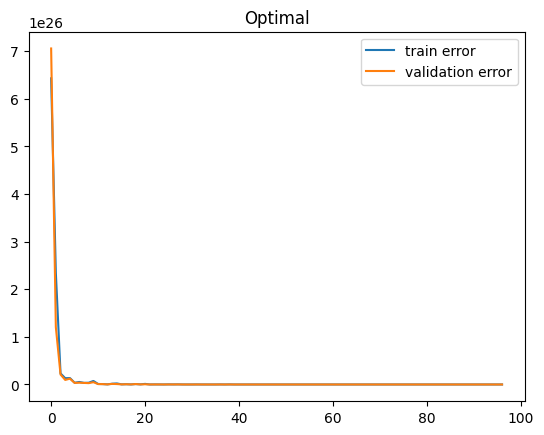

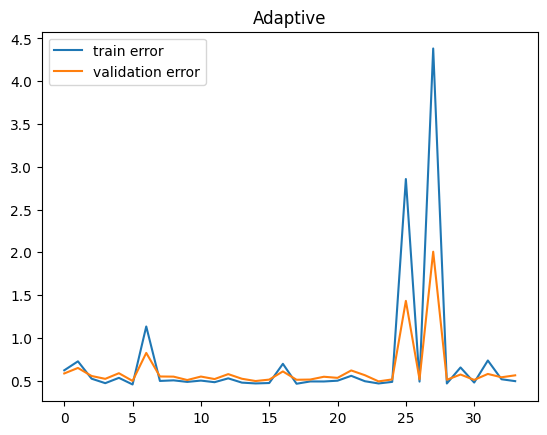

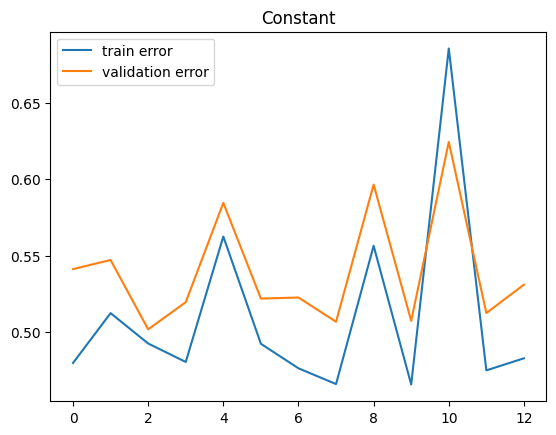

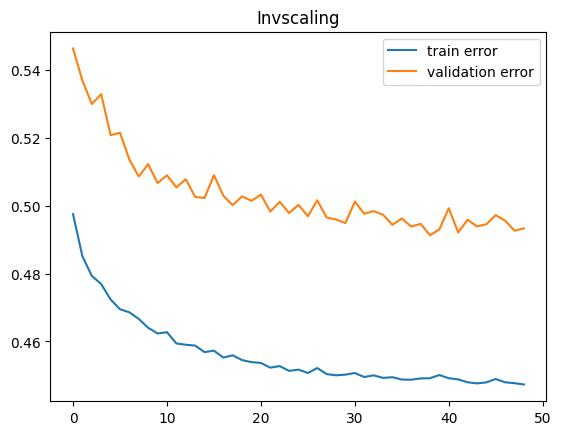

In [61]:
plt.figure()
plt.plot(tr_errors_1, label='train error')
plt.plot(val_errors_1, label='validation error')
plt.title("Optimal")
plt.legend()
plt.show()

plt.figure()
plt.plot(tr_errors_2, label='train error')
plt.plot(val_errors_2, label='validation error')
plt.title("Adaptive")
plt.legend()
plt.show()

plt.figure()
plt.plot(tr_errors_3, label='train error')
plt.plot(val_errors_3, label='validation error')
plt.title("Constant")
plt.legend()
plt.show()

plt.figure()
plt.plot(tr_errors_4, label='train error')
plt.plot(val_errors_4, label='validation error')
plt.title("Invscaling")
plt.legend()
plt.show()

> g) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [62]:
reg4 = SGDRegressor(loss='squared_error', 
                   penalty=None,                    
                   tol=0.001, 
                   shuffle=True,                                                          
                   warm_start=True,
                   learning_rate='invscaling')

reg = reg4
y_tr = np.asarray(y_tr).ravel()
y_test = np.asarray(y_test).ravel()

tr_errors_4, val_errors_4 = [], []

# train the model using early stopping
n_epochs = 100
best_val_error = float('inf')
patience = 10  # stop tring if validation error doesn't improve after 10 epochs
epoch_since_best = 0
for epoch in range(n_epochs):
    reg.partial_fit(X_tr, y_tr)
    
    # collect the train and validation errors after each epoch
    y_tr_pred = reg.predict(X_tr)
    y_val_pred = reg.predict(X_val)
    tr_error = mean_squared_error(y_tr, y_tr_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    tr_errors_4.append(tr_error)
    val_errors_4.append(val_error)
    
    # check if validation error has improved
    if val_error < best_val_error:
        best_val_error = val_error
        epoch_since_best = 0
    else:
        epoch_since_best += 1
        if epoch_since_best >= patience:
            print(f"Stopping training after {epoch+1} epochs")
            break  

Stopping training after 61 epochs


In [63]:
y_pred_r4 = reg4.predict(X_test)
y_pred_r4 = y_scaler.inverse_transform(y_pred_r4.reshape(-1,1))

> h) Calcule el error cuadrático medio en la escala original de bicicletas

In [64]:
mse_r4 = mean_squared_error(y_test, y_pred_r4)
r2_r4 = r2_score(y_test,y_pred_r4)

print('Error cuadrático medio: ', mse_r4)
print('Coeficiente de correlación: ', r2_r4)

Error cuadrático medio:  185365.18518370786
Coeficiente de correlación:  0.5351717246930037


> i) ¿Mejoran los resultados con respecto al modelo anterior?

Nuevamente los resultados no mejoran, a pesar de aplicar gradiente descendente estocástico y escoger el modelo que mostraba un menor error de validación, se prueba que ante un nuevo intento de ajustar los datos con el modelo lineal, no se obtiene buenos resultados. Lo cual sirve en parte para rectificar la hipótesis asociada a que el conjunto de datos no puede ser representado de buena manera a través de un hiperplano. Si bien los errores de entrenamiento y validación en el gráfico de _learning\_rate_ invscaling tienden a ser cercanos a 0.46 es importante recalcar que esto es con los datos del conjunto normalizados a media 0 y varianza 1.

> j) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

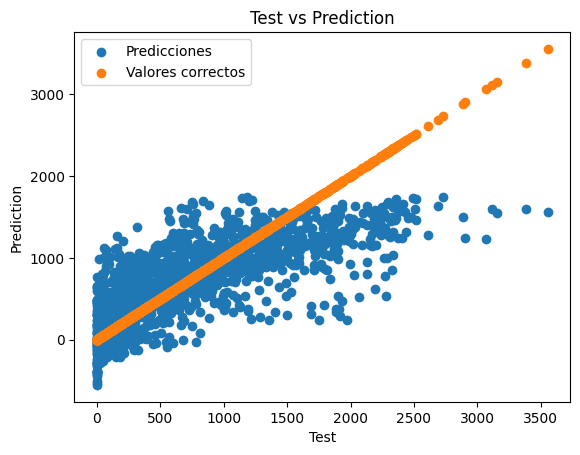

In [65]:
plt.figure()
plt.scatter(y_test, y_pred_r4, label='Predicciones')
plt.scatter(y_test, y_test, label='Valores correctos')
plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')
plt.legend()


plt.show()

## 1.3 Modelo con Regularización

### 1.3.1 Regularización Ridge y Lasso

Agregue regularización Ridge al modelo SGD y entrénelo por 100 _epochs_ como máximo, utilizando early_stoping con un a paciencia de 10 _epochs_. Grafique el error cuadrático medio por _epoch_ y responda las siguientes preguntas:

> a) ¿Qué son los llamados _hiperparámetros_ de un modelo y como se relacionan con el concepto de _hyper tuning_?


Los hiperparámetros son parámetros que se ajustan antes de empezar el proceso de aprendizaje del modelo, donde estos tienen influencia en la capacidad de aprendizaje, generalización y rendimiento.

Se relacionan con el concepto de hyper tuning, pues este corresponde al proceso de establecer los valores de los hiperparámetros de tal forma que la combinación de estos optimice el comportamiento del modelo. Implica probar diferentes combinaciones de valores de hiperparámetros y evaluar su impacto en el rendimiento del modelo utilizando técnicas como la validación cruzada.

> b) ¿Cuál es la motivación de agregar una penalización al modelo?

La motivación para agregar penalización a los modelos con regularización es la de poder disminuir la dimensión de la regresión de los datos de entrada (o disminuir la magnitud de los coeficientes). Con ello se busca reducir la complejidad del modelo, permitiendo tener un mejor desempeño computacional, evitar el sobreajuste y mejorar la generalización del modelo.

> c) ¿De qué se compone la penalización mediante regularización Ridge?

La penalización mediante regularización Ridge está compuesta por una suma de los cuadrados de los coeficientes del modelo de regresión lineal controlada por un parámetro $\lambda$. El objetivo de sumar esta penalización a la función de costo original busca suavizar y regularizar los coeficientes de la regresión, evitando que tomen valores excesivamente altos y reduciendo aquellos menos determinantes. De esta forma se busca evitar el sobreajuste y mejorar la capacidad de generalización del modelo.

> d) ¿Cómo funciona la regularización Lasso?

La regularización Lasso se utiliza para evitar el _overfitting_ en un modelo. Consiste en agregar en la función de costos una penalización en función de un parámetro ($\lambda$) y el valor absoluto de los coeficientes de la regresión del modelo.
Se aplica la regularización lasso con la finalidad de eliminar características no representativas de los datos y con ello evitar un modelo demasiado complejo, previendo un sobreajuste.
La capacidad de eliminar características dependerá de la magnitud del parámetro lambda, ante un parámetro muy elevado de lambda la regularización lasso podría incluso eliminar características importantes para entrenar el modelo y viceversa, si se escoge un parámetro muy bajo puede que no se logren eliminar características que no son determinantes en el desempeño del modelo. 


> e) ¿Cuáles son las ventajas y desventajas de usar regularización Ridge versus Lasso?


La regularización Ridge ($\ell_2$) tiene como ventaja tener menos probabilidad de sufrir _underfitting_ al no lograr anular completamente ciertos coeficientes de la regresión, pero si disminuir la magnitud, es decir, todos estos estarán presentes en el modelo, permitiendo tener una selección más suave de las características. Mientras que la regularización Lasso ($\ell_1$), tiene un riesgo mayor de sufrir _underfitting_, esto pues, si no se escoge un parámetro $\lambda$ adecuado se puede llegar a eliminar características relevantes del modelo.

Por otro lado, una desventaja de $\ell_2$ sobre $\ell_1$ es que esta no logra eliminar completamente los coeficientes de la regresión de las caracterísitcas no relevantes, esto, en caso de trabajar en modelos con una cantidad extensa de características puede llegar a ser una desventaja, pues al tener gran cantidad de _features_ existe alta probabilidad de que algunas no sean relevantes para el modelo.

> f) Utilizando GridSearchCV optimize el hiperparámetro _learning rate_ para los valores 0.1, 0.01, 0.001.

> g) Pruebe con distintos tipos de _learning rate_ 'constant', 'optimal', 'invscaling'.

> h) Optimize también los hiperparámetros de coeficiente de regularización de l2 y l1 para los valores 0.0001, 0.001, 0.01.



> **Nota:** Investigue y lea la documentación de SGDRegressor, de KFold y de GridSearchCV antes de modificar y ejecutar el código, recuerde que el código presentado en el notebook es solo una guía de referencia y no necesariamente funciona, usted puede modificar su propio código y explicar su funcionamiento.

In [66]:
k=5
cv_folds=KFold(n_splits=k, shuffle=True)

In [67]:
reg = SGDRegressor(loss='squared_error', 
                   penalty='l2', # regularization therm
                   alpha=0.0001, # regularization coeficient
                   max_iter=5000, #epochs
                   tol=0.001, 
                   shuffle=True,                                       
                   learning_rate='invscaling', # type of lr
                   eta0=0.01,    # learning rate coeficient
                   power_t=0.25                   
                   )

In [68]:
param_grid = {'eta0': [0.1, 0.01, 0.001], 
              'penalty': ['l2', 'l1'],
              'alpha': [0.0001, 0.001, 0.01],                
              'learning_rate': ['constant', 'optimal', 'invscaling']}

hypereg = GridSearchCV(reg, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=0, 
            )

In [69]:
hypereg.fit(X_train, y_train.ravel())

c:\Users\Nicolás\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Nicolás\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Nicolás\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Nicolás\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before converg

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SGDRegressor(max_iter=5000),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'eta0': [0.1, 0.01, 0.001],
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'penalty': ['l2', 'l1']},
             scoring='neg_mean_squared_error')

> i) Obtenga los resultados para cada hiperparámetro de la grilla.

In [70]:
pd.DataFrame(hypereg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_learning_rate,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012050,0.006163,0.003517,0.001526,0.0001,0.1,constant,l2,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-4.761224e+23,-4.791577e+23,-3.364284e+23,-9.926371e+23,-9.425825e+23,-6.453856e+23,2.685688e+23,53
1,0.010912,0.002024,0.001773,0.000575,0.0001,0.1,constant,l1,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-4.988916e+22,-8.972780e+22,-5.831927e+23,-3.124149e+23,-1.263961e+24,-4.598371e+23,4.446579e+23,52
2,0.024739,0.005571,0.002057,0.000556,0.0001,0.1,optimal,l2,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-2.689610e+14,-5.610648e+21,-6.505971e-01,-1.743406e+18,-1.377844e+18,-1.122754e+21,2.243947e+21,47
3,0.048642,0.014508,0.002355,0.000687,0.0001,0.1,optimal,l1,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-8.112580e+12,-5.193338e+19,-1.033926e+17,-1.806411e+20,-7.147774e-01,-4.653557e+19,7.000070e+19,45
4,0.010394,0.001353,0.001896,0.000513,0.0001,0.1,invscaling,l2,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-4.575129e-01,-5.760347e-01,-4.846047e-01,-5.746351e-01,-5.435507e-01,-5.272676e-01,4.811006e-02,33
5,0.017247,0.002915,0.001879,0.000560,0.0001,0.1,invscaling,l1,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-4.741819e-01,-4.631111e-01,-4.694814e-01,-4.896210e-01,-5.355520e-01,-4.863895e-01,2.609284e-02,20
6,0.008449,0.001500,0.002045,0.000978,0.0001,0.01,constant,l2,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-4.760316e-01,-4.616730e-01,-5.008388e-01,-5.565995e-01,-5.781933e-01,-5.146672e-01,4.535682e-02,30
7,0.012278,0.002771,0.001898,0.000451,0.0001,0.01,constant,l1,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-4.633759e-01,-5.052432e-01,-4.552400e-01,-4.890477e-01,-5.405431e-01,-4.906900e-01,3.066783e-02,21
8,0.026796,0.004169,0.001608,0.000376,0.0001,0.01,optimal,l2,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-8.034776e-01,-1.304633e+00,-6.981161e+16,-1.527510e+20,-9.626218e+15,-3.056610e+19,6.109248e+19,44
9,0.083152,0.027241,0.002626,0.001126,0.0001,0.01,optimal,l1,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-4.728330e-01,-3.394669e+17,-5.300863e-01,-5.743372e-01,-5.654333e-01,-6.789338e+16,1.357868e+17,41


De todas las combinaciones probadas y recién expuestas, se puede apreciar que la mejor combinación de hiperparámetros es:

In [71]:
print(hypereg.best_params_)

{'alpha': 0.0001, 'eta0': 0.001, 'learning_rate': 'constant', 'penalty': 'l1'}


> j) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [72]:
X_test.head()
y_pred_reg = hypereg.predict(X_test)
y_pred_reg = y_scaler.inverse_transform(y_pred_reg.reshape(-1,1))

> k) Calcule el error cuadrático medio en la escala original de bicicletas

In [73]:
mse_reg = mean_squared_error(y_test, y_pred_reg)
r2_reg = r2_score(y_test,y_pred_reg)
print('Error cuadrático medio: ', mse_reg)
print('Coeficiente de correlación: ', r2_reg)

Error cuadrático medio:  189018.2505976862
Coeficiente de correlación:  0.5260111690348291


> l) ¿Mejoran los resultados con respecto a los modelo anteriores?

Como ya es tendencia en torno al conjunto de datos trabajado, los resultados no mejoran. A pesar de haber aplicado técnicas de regresión que permitan encontrar los coeficientes de la regresión de forma más suave y controlada, sin sobreajustar al conjunto de entrenamiento, siguen sin ser una buena representación el modelo lineal para el conjunto de datos. Corroborándose nuevamente a través del error cuadrático medio y el coeficiente de correlación mostrados en la línea anterior.

> m) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

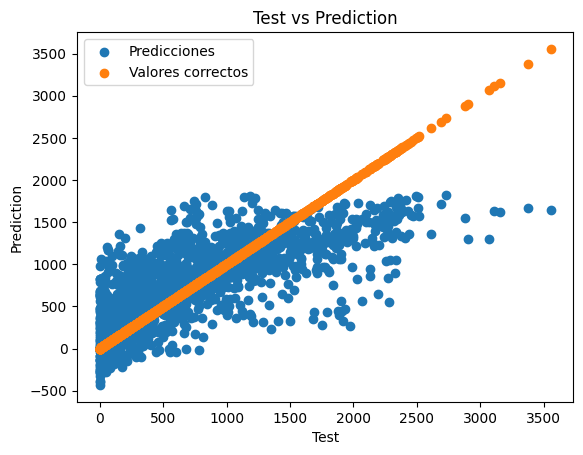

In [74]:
plt.figure()
plt.scatter(y_test, y_pred_reg, label='Predicciones')
plt.scatter(y_test, y_test, label='Valores correctos')
plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')
plt.legend()


plt.show()

## 1.4 Conclusiones:

En síntesis y sin ánimos de redundar en todo lo ya dicho, es importante importante mencionar que desde un comienzo con la regresión bruta el modelo demostró no ser idóneo para los datos trabajados con errores altos, mala predicción y baja capacidad de generalización. A medida que se incluyeron nuevas técnicas que se tendería a pensar que mejorarían el modelo (tal como variables cíclicas para rescatar patrones importantes de algunas _features_, gradiente descendiente estocástico y regularización de las categorías) se puede ver que los resultados no mejoran, e incluso se emperora el rendimiento del modelo. Siguiendo con la hipótesis planteada desde un principio es claro que si el conjunto de datos no se puede representar por un hiperplano (modelo lineal), por más técnicas que apliquemos o por más que busquemos los coeficientes óptimos de la regresión, nunca podremos encontrarlos ya que dicho de cierta forma "no existen". 

Un indicio claro de todo esto es hacia la parte final, cuando se aplica regularización y se busca la combinación óptima de hiperparámetros no se logra convergencia incluso llevando el número máximo de iteraciones a 5000. De aquí en adelante es claro que los resultados no serán buenos, dado que ni siquiera se logra convergencia en el entrenamiento y búsqueda de hiperparámetros óptimos.

Finalmente a modo resumen, en la figuras siguientes se muestra la evolución del MSE y el coeficiente de correlación con las diferentes técnicas de preprocesamiento y búsqueda de coeficientes e hiperparámetros óptimos implementadas para dejar constancia gráfica de todo lo expuesto anteriormente.

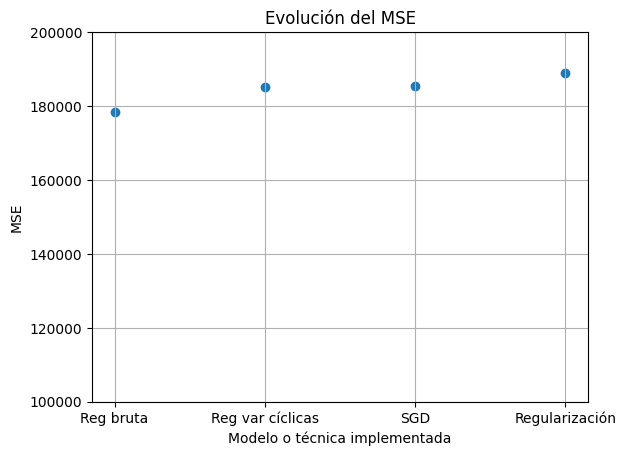

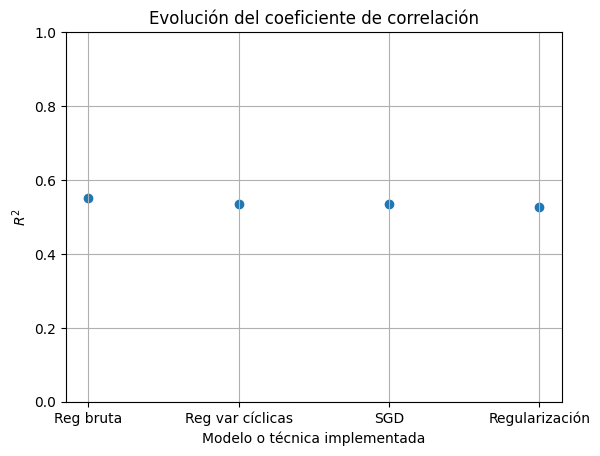

In [75]:
x_finalp1 = ["Reg bruta", "Reg var cíclicas", "SGD", "Regularización"]

y_finalp1 = [mse_bruto, mse_varciclicas, mse_r4, mse_reg]

y_finalp11 = [r2_bruto, r2_varciclicas, r2_r4, r2_reg]

plt.figure()
plt.scatter(x_finalp1, y_finalp1)
plt.xlabel('Modelo o técnica implementada')
plt.ylabel('MSE')
plt.title('Evolución del MSE')
plt.ylim([100000,200000])
plt.grid()

plt.show()

plt.figure()
plt.scatter(x_finalp1, y_finalp11)
plt.xlabel('Modelo o técnica implementada')
plt.ylabel('$R^2$')
plt.title('Evolución del coeficiente de correlación')
plt.ylim([0,1])
plt.grid()

plt.show()

# 2. Clasificación de hongos



La tarea de clasificación se refiere a un problema en el que se tiene un conjunto de datos y se quiere predecir la clase a la que pertenece cada elemento del conjunto de datos.

Para hacer esto, utilizaríamos un algoritmo de clasificación que examina las características de cada fruta en el conjunto de datos y aprende patrones que pueden ser utilizados para predecir su clase.

Hay muchos algoritmos de clasificación diferentes que se pueden utilizar en el aprendizaje automático, por ejemplo la regresión logística, el SVM (máquina de soporte vectorial), Random Forest y redes neuronales, etcétera.

Una vez que se entrena el modelo, se utiliza para predecir la clase de nuevos datos que no se incluyeron en el conjunto de datos original. Para medir el desempeño del modelo, se pueden utilizar diferentes métricas de evaluación, como la precisión, el recall y la F1-score.

La tarea de clasificación es muy útil en muchas áreas, como la medicina, la banca, el comercio electrónico y la publicidad, ya que permite la automatización de tareas que antes requerían una gran cantidad de tiempo y recursos humanos.

<center><img src=https://w0.peakpx.com/wallpaper/496/595/HD-wallpaper-red-mushroom-mushroom-red-beautiful.jpg></center>

Este conjunto de datos incluye descripciones de muestras correspondientes a 23 especies de hongos de la familia Agaricus y Hongo Lepiota extraídas de la Guía de campo de hongos norteamericanos de la Audubon Society. Cada especie se identifica como definitivamente comestible, definitivamente venenosa o de comestibilidad desconocida y no recomendada. Esta última clase se ha combinado con la venenosa.

## 2.1 Manipulación y exploración del conjunto de datos

In [76]:
df = pd.read_csv('mushrooms.csv',encoding= 'unicode_escape')
df.head(1)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u


In [77]:
def datainfo():
    temp_ps = pd.DataFrame(index=df.columns)
    temp_ps['DataType'] = df.dtypes
    temp_ps["Non-null_Values"] = df.count()
    temp_ps['Unique_Values'] = df.nunique()
    temp_ps['NaN_Values'] = df.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(df))*100 
    return temp_ps

datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
class,object,8124,2,0,0.0
cap-shape,object,8124,6,0,0.0
cap-surface,object,8124,4,0,0.0
cap-color,object,8124,10,0,0.0
bruises,object,8124,2,0,0.0
odor,object,8124,9,0,0.0
gill-attachment,object,8124,2,0,0.0
gill-spacing,object,8124,2,0,0.0
gill-size,object,8124,2,0,0.0
gill-color,object,8124,12,0,0.0


### 2.1.1 Exploración de features

> a) ¿Por qué la variable _veil-type_ no aporta ningún valor al entrenamiento? Grafique, justifique y elimine la columna.

- La feature "veil-type" no aporta ningún valor al entrenamiento puesto que en todas las muestras toma el mismo valor, es decir, muestra ser independiente del par de entrenamiento a seleccionar en el conjunto.
De hecho, desde la exploración de la información de data, se observa que es un valor único "p" para todas las muestras.

<Axes: xlabel='veil-type', ylabel='count'>

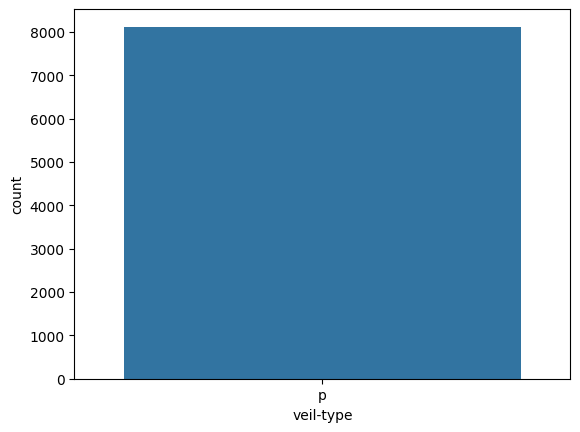

In [78]:
sns.countplot(x="veil-type", data=df)

In [79]:
df.drop('veil-type', axis=1, inplace=True)

> b) Grafique la distribución de cada variable

c:\Users\Nicolás\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


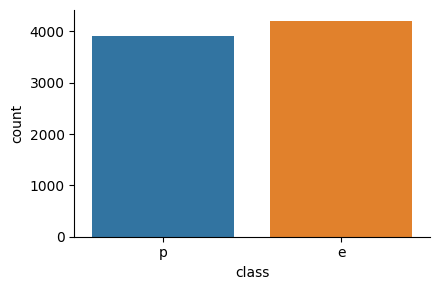

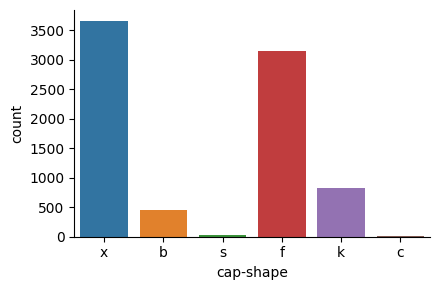

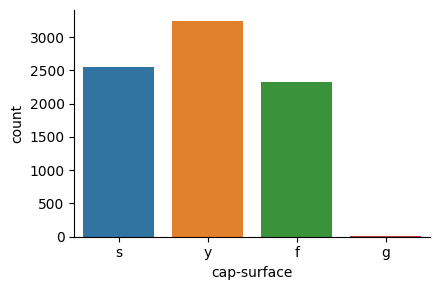

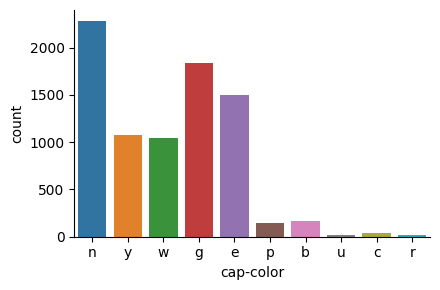

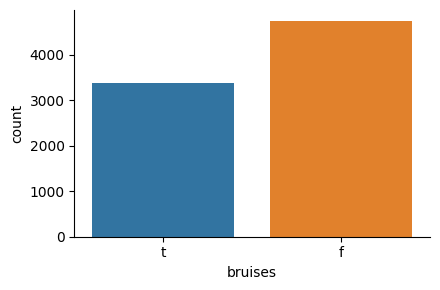

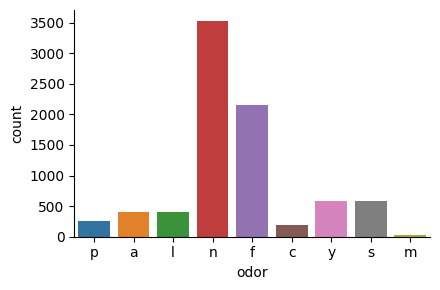

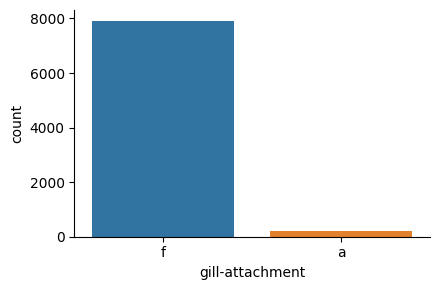

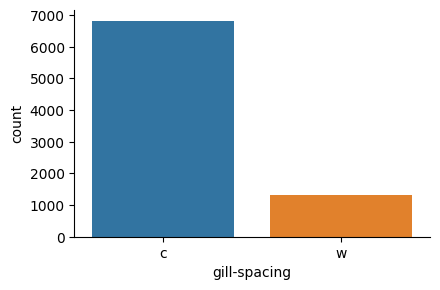

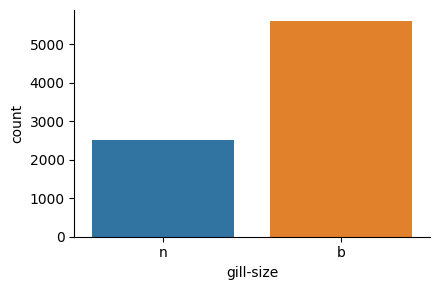

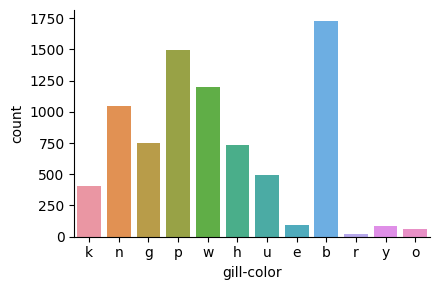

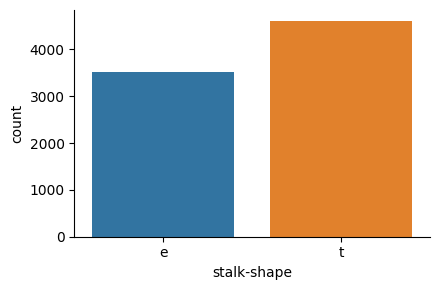

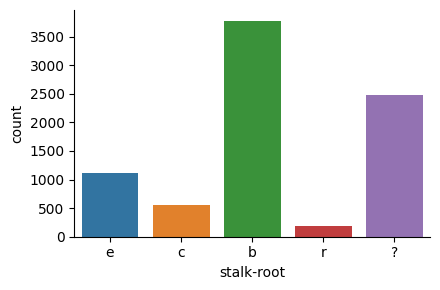

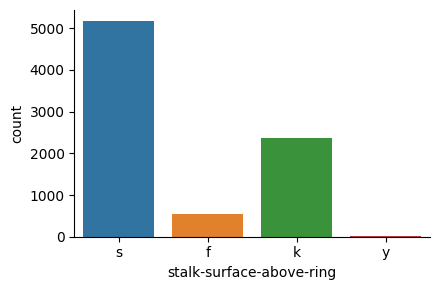

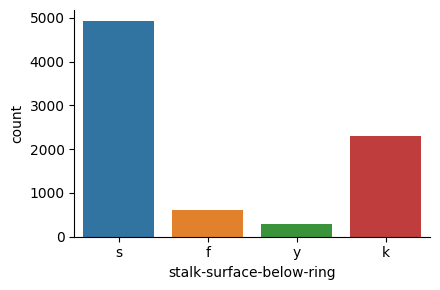

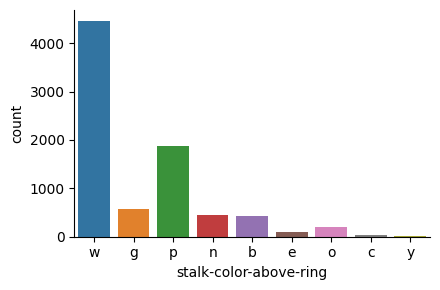

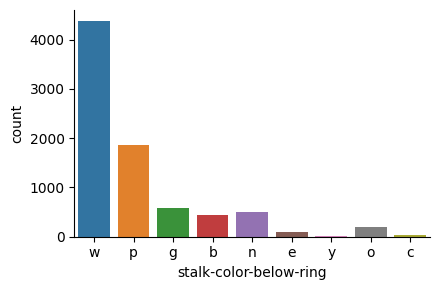

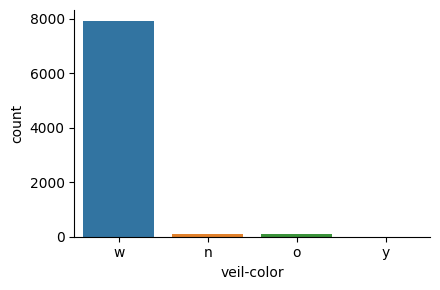

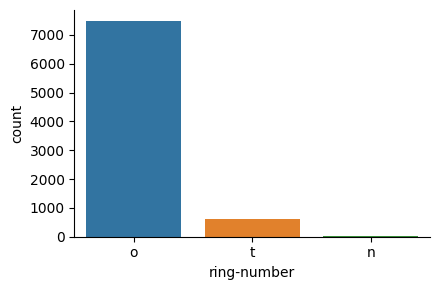

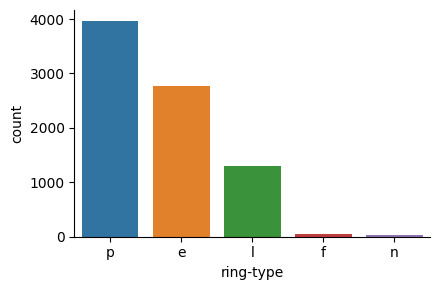

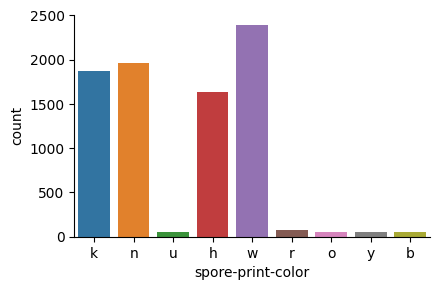

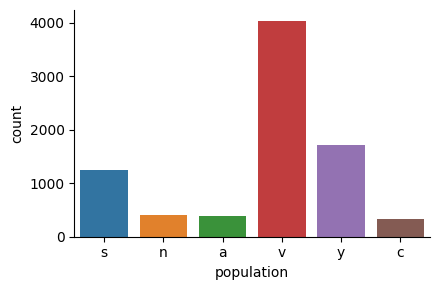

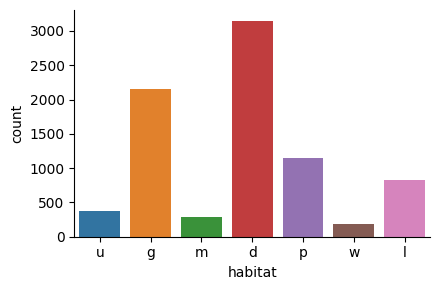

In [80]:
for col in df.columns:    
    sns.catplot(x=col, kind="count", data=df, height=3, aspect=1.5)

> c) Separe el conjunto de datos en los subconjuntos de entrenamiento y prueba.

- En este caso o problema en particular, resulta sensato realizar la división del conjunto de manera que se conserve el ratio o proporción características del target, es decir, que cada conjunto tenga la misma proporción de hongos comestibles/venenosos, pues es importante tener en ambos la misma cantidad de ejemplos representativos del total disponible (no se quiere que se entrene para predecir sólo una clase).

In [128]:
X = df.drop('class',axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=41)
train_set = pd.concat([y_train,X_train], axis=1)
test_set = pd.concat([y_test,X_test], axis=1)
print(test_set['class'].value_counts())
print('Train set shape:', train_set.shape)
print('Test set shape:', test_set.shape)

e    1263
p    1175
Name: class, dtype: int64
Train set shape: (5686, 22)
Test set shape: (2438, 22)


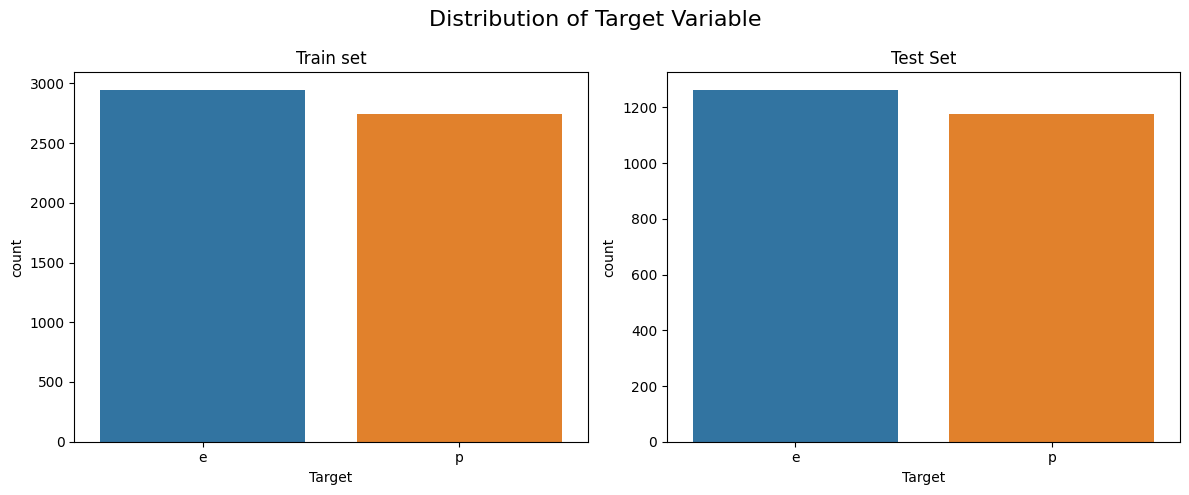

In [129]:
 ################       Aquí se verifica la estratificación              ######################

target_order = np.unique(np.concatenate((y_train, y_test)))

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the distribution of the target variable in the original dataset
sns.countplot(x=y_train, order=target_order, ax=axes[0])
axes[0].set_title("Train set")
axes[0].set_xlabel("Target")
axes[0].set_xticklabels(target_order)

# Plot the distribution of the target variable in the training set
sns.countplot(x=y_test, order=target_order, ax=axes[1])
axes[1].set_title("Test Set")
axes[1].set_xlabel("Target")
axes[1].set_xticklabels(target_order)

# Set the labels and adjust the layout
fig.suptitle("Distribution of Target Variable", fontsize=16)
plt.tight_layout()
plt.show()


> d) Codifique las variables de entrada para que puedan ser trabajadas en las siguientes preguntas.

- Se codifican las variables en forma binaria de manera que, en caso de que la feature posea más de dos atributos, se genera una variable binaria por cada uno y, si la feature posee dos atributos, se codifiquen como 0 y 1 cada uno.

In [130]:
drop_cols = []
label_encoder = LabelEncoder()

# iterate over columns and check for binary variables
for col in train_set.columns:
    if len(train_set[col].unique()) == 2:
      train_set[col] = label_encoder.fit_transform(train_set[col])
      test_set[col] = label_encoder.transform(test_set[col])

    else:
       # get dummies for categorical variables with more than 2 categories
       train_set = pd.concat([train_set, pd.get_dummies(train_set[col], prefix=col)], axis=1)
       test_set = pd.concat([test_set, pd.get_dummies(test_set[col], prefix=col)], axis=1)
       # add the original column to the list of columns to be dropped
       drop_cols.append(col)
        
# drop the original categorical columns from the train and test sets
train_set.drop(drop_cols, axis=1, inplace=True)
test_set.drop(drop_cols, axis=1, inplace=True)

# ensure that the train and test sets have the same columns
train_set, test_set = train_set.align(test_set, join='outer', axis=1, fill_value=0)

# print the shapes of the train and test sets
print('Train set shape:', train_set.shape)
print('Test set shape:', test_set.shape)


Train set shape: (5686, 112)
Test set shape: (2438, 112)


> e) Separe los subconjuntos en _X_ e _y_

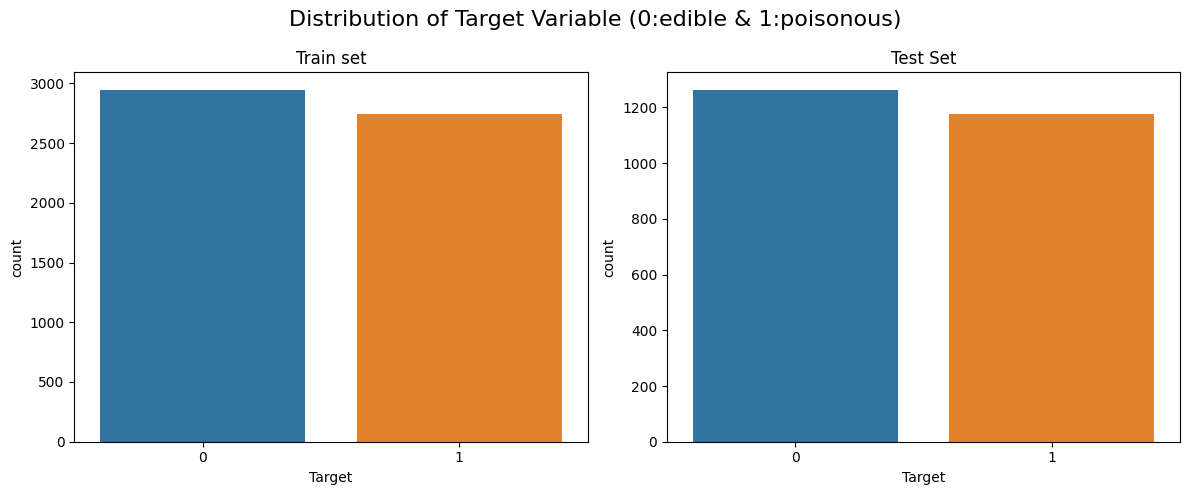

In [131]:
# Separación de los conjuntos en X e y

X_train = train_set.drop('class', axis=1)
y_train = train_set['class']
X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

 ################       Verify the stratification              ######################

target_order = np.unique(np.concatenate((y_train, y_test)))

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the distribution of the target variable in the original dataset
sns.countplot(x=y_train, order=target_order, ax=axes[0])
axes[0].set_title("Train set")
axes[0].set_xlabel("Target")
axes[0].set_xticklabels(target_order)

# Plot the distribution of the target variable in the training set
sns.countplot(x=y_test, order=target_order, ax=axes[1])
axes[1].set_title("Test Set")
axes[1].set_xlabel("Target")
axes[1].set_xticklabels(target_order)

# Set the labels and adjust the layout
fig.suptitle("Distribution of Target Variable (0:edible & 1:poisonous)", fontsize=16)
plt.tight_layout()
plt.show()


### 2.1.2 Principal Component Analisis

PCA (Principal Component Analysis) es una técnica de reducción de dimensionalidad comúnmente usada en machine learning para reducir el número de características en el conjunto de datos conservando la información más importante.

> a) Aplique PCA a los datos preprocesados para reducir el número de características a un conjunto más pequeño de componentes principales que capturen los patrones más importantes de los datos. Pruebe con n_components = n_features - k, donde k={1,10,50}, es decir, cree 3 posibles transformaciones de "*X_train*" y apliquelas sobre "*X_test*".

**Nota:** En adelante se le llamará "representación de los datos" a las distintas _feature selection/extraction_, por ejemplo: una posible representación de los datos es aplicar PCA con las 80 componentes principales.

In [132]:
n_features = X_train.shape[1]
pca_1 = PCA(n_components=n_features - 1)
pca_10 = PCA(n_components=n_features - 10)
pca_50 = PCA(n_components=n_features - 50)

pca_1.fit(X_train)
pca_10.fit(X_train)
pca_50.fit(X_train)

X_train_pca_1 = pca_1.transform(X_train)
X_test_pca_1 = pca_1.transform(X_test)

X_train_pca_10 = pca_10.transform(X_train)
X_test_pca_10 = pca_10.transform(X_test)

X_train_pca_50 = pca_50.transform(X_train)
X_test_pca_50 = pca_50.transform(X_test)

# Access the principal components
principal_components_1 = pca_1.components_
principal_components_10 = pca_10.components_
principal_components_100 = pca_50.components_

# Access the explained variance ratios
explained_variance_ratios_1 = pca_1.explained_variance_ratio_
explained_variance_ratios_10 = pca_10.explained_variance_ratio_
explained_variance_ratios_50 = pca_50.explained_variance_ratio_

# print("Explained Variance Ratios 10 componentes menos:")
print(explained_variance_ratios_50)


[0.16173143 0.13859209 0.09188387 0.05578089 0.04006819 0.03802204
 0.03295304 0.0280063  0.02297267 0.02238952 0.02214371 0.0195722
 0.019332   0.01710826 0.01623434 0.01597111 0.01566113 0.01500144
 0.01343925 0.0121087  0.01159943 0.01132371 0.01038219 0.00982381
 0.00925976 0.00904207 0.0088973  0.00810955 0.0077832  0.00753539
 0.00688273 0.00671197 0.00648534 0.00570746 0.00559124 0.00541527
 0.00511783 0.00484978 0.00474219 0.0045906  0.0043561  0.00403438
 0.00369068 0.00350838 0.00336687 0.00294628 0.00282417 0.00249031
 0.0023471  0.00218297 0.00193896 0.00176876 0.00160217 0.00131284
 0.0012228  0.00113119 0.00106441 0.00094545 0.00079588 0.00071048
 0.0006917 ]


### 2.1.3 Mutual Information

La información mutua es una medida de dependencia entre variables, se puede usar para medir el grado de asociación entre las _features_ y el _target_, y usar esta información para seleccionar las _features_ más relevantes para posteriormente realizar la clasificación. Al utilizar la información mutua para seleccionar las características más informativas, puede mejorar potencialmente el rendimiento de su modelo de aprendizaje automático reduciendo la cantidad de información irrelevante o redundante en el conjunto de datos.

> a) Calcule la información mutua entre cada característica y la variable objetivo (comestible o venenoso) para medir el grado de asociación entre cada característica y la variable objetivo.

> b) Seleccione las n características con las puntuaciones de información mutua más altas como entrada para un modelo de aprendizaje automático. Pruebe con n = n_features - k, para k={1,10,50}, es decir, cree 3 posibles transformaciones de "X_train" y apliquelas sobre "X_test".





In [133]:
mi =mutual_info_classif(X_train, y_train)

In [134]:
# set k to the number of features you want to exclude
k = 1, 10, 50
# get the indices of the features sorted by mutual information score
# Esto ordena los índices que ordenarían el array en orden ASCENDENTE
sorted_indices = np.argsort(mi)
for i in k:
  # compute the number of features to select
  n = len(mi) - i
  
  # # # # # # # # get the indices of the features sorted by mutual information score
  # # # # # # # sorted_indices = np.argsort(mi)

  # select the top n features
  selected_indices = sorted_indices[-n:]
  selected_columns = X_train.iloc[:,selected_indices]
  if i == 1:
    X_train_mi_1 =  X_train.iloc[:,selected_indices]
    X_test_mi_1 =  X_test.iloc[:,selected_indices]
    # print(X_train.drop(X_input_1,axis=1))
  elif i == 10:
    X_train_mi_10 =  X_train.iloc[:,selected_indices]
    X_test_mi_10 = X_test.iloc[:,selected_indices]
    # print(X_train.drop(X_input_10,axis=1))
  else:
    X_train_mi_50 =  X_train.iloc[:,selected_indices]
    X_test_mi_50 =  X_test.iloc[:,selected_indices]
    # X_input_50.head()
    # print(X_train.drop(X_input_50,axis=1))


## 2.2 Modelos de clasificación

Primero entrenaremos el modelo Naïve Bayes con los conjuntos de datos de entrenamiento generados en el punto 2.1, luego entrenaremos otros clasificadores utilizando como conjunto de entrenamiento la mejor representación de los datos según las metricas de clasificación obtenidas con el modelo Naïve Bayes.

### 2.2.1 Naïve Bayes

Naïve Bayes es un modelo generativo clásico para la clasificación en el aprendizaje automático. En el contexto de la clasificación de hongos, puede utilizar Naïve Bayes para modelar la distribución de probabilidad de cada característica dada la etiqueta de clase (comestible o venenosa) y utilizar la regla de Bayes para calcular la probabilidad posterior de cada etiqueta de clase dadas las características observadas.

Al utilizar Naïve Bayes para la clasificación, se puede conseguir un buen rendimiento con cantidades relativamente pequeñas de datos de entrenamiento y modelos relativamente sencillos. Sin embargo, Naïve Bayes asume que las características son condicionalmente independientes dada la etiqueta de clase, lo que puede no ser cierto en la práctica. No obstante, Naïve Bayes puede ser un modelo _baseline_ útil para comparar con modelos más complejos.

Dado el conjuntos de entrenamiento con características observadas, se utiliza la regla de Bayes para calcular la probabilidad a posteriori de cada etiqueta de clase dadas las características observadas. La etiqueta de clase con la probabilidad a posteriori más alta sería la etiqueta de clase predicha para la muestra de hongos.

Si consideramos que $P(x_1, \dots, x_n)$ es constante, entonces:

\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y).\end{aligned}\end{align}

Usted deberá utilizar la estimación Máxima A Posteriori (MAP) para estimar $P(y)$ y $P(x_i \mid y)$, donde $P(y)$ es la frecuancia relativa de la clase $y$ y $P(x_i \mid y)$ asumiremos que se distribuye de forma Gaussiana, es decir:

\begin{align}\begin{aligned}P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)\end{aligned}\end{align}

> a) ¿Qué otras distribuciones de probabilidad se pueden asumir para este problema considerando los valores posibles de las _features_ y del target en el conjunto de datos? Nombre mínimo 2.

Para las preguntas b) y c) considere que los datos siguen una distribución de probabilidad Gaussiana y entrene el clasificador utilizando el módulo _GaussianNB_ de la librería _sklearn_.

> b) Entrene e clasificador Naïve Bayes con los datos en _bruto_, es decir, tal cual como vienen, sin haber aplicado ninguna extracción o selección de características.

> c) Entrene e clasificador Naïve Bayes con cada una de las representaciones obtenidas en el punto 2.1.

#### Respuestas
a) Es posible estimar la probabilidad usando una función logística (logistic regression) y también una QDA, donde se asume que las variables del problema están relacionadas, es decir, las matrices de covarianza pueden no ser iguales entre clases.

b) Se utilizará el vector X_train, pero con la primera columna "veil..." quitada, como se hizo en las primeras líneas de código de la sección.

In [135]:
clf = GaussianNB()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9589827727645611


c) Se entrenará el modelo con el conjunto obtenido de la aplicación de PCA y con mutual information.

In [136]:
# Defining the representations of the data that I will train the model with
representations = {
    'Original': (X_train, X_test),
    'PCA 1 left': (X_train_pca_1, X_test_pca_1),
    'PCA 10 left': (X_train_pca_10, X_test_pca_10),
    'PCA 50 left': (X_train_pca_50, X_test_pca_50),
    'MI score 1 left': (X_train_mi_1 , X_test_mi_1),
    'MI score 10 left': (X_train_mi_10, X_test_mi_10),
    'MI score 50 left': (X_train_mi_50, X_test_mi_50)
}
# Preparing the df to show the results of every training
results_table = pd.DataFrame(columns=['Representation', 'Accuracy'])

# Prepare a list to store the results
results_acurracy = []
# report = []
results_reports = pd.DataFrame()
# Train and evaluate GaussianNB for each representation
for rep_name, (X_train_, X_test_) in representations.items():
    # Create and train the GaussianNB model
    clf.fit(X_train_, y_train)

    # Make predictions
    y_pred = clf.predict(X_test_)
    
    report = classification_report(y_test, y_pred, target_names=['edible','poisonous'], output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df['Pair'] = rep_name
    results_reports = pd.concat([results_reports,report_df])
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)  # Assuming y_test is the same for all representations

    # Add results to the table
    results_acurracy.append({'Representation': rep_name, 'Accuracy': accuracy})
    

# Sort the table based on accuracy (descending order)
results_table = pd.DataFrame(results_acurracy)

# Sort the table based on accuracy (descending order)
results_table = results_table.sort_values('Accuracy', ascending=False)

# Print the results table
print(results_table)


     Representation  Accuracy
5  MI score 10 left  0.980722
4   MI score 1 left  0.959803
0          Original  0.958983
3       PCA 50 left  0.939295
6  MI score 50 left  0.926169
1        PCA 1 left  0.917966
2       PCA 10 left  0.917966


> d) Para cada representación de los datos del punto 2.1, obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [137]:
# Reset the index of the DataFrame
results_reports.reset_index(inplace=True)
results_reports.rename(columns={'index': 'Class'}, inplace=True)

# Reorder the columns
columns_order = ['Pair', 'Class', 'precision', 'recall', 'f1-score', 'support']
results_reports = results_reports[columns_order]

# Print the DataFrame
print(results_reports)


                Pair         Class  precision    recall  f1-score      support
0           Original        edible   0.999142  0.921615  0.958814  1263.000000
1           Original     poisonous   0.922231  0.999149  0.959150  1175.000000
2           Original      accuracy   0.958983  0.958983  0.958983     0.958983
3           Original     macro avg   0.960686  0.960382  0.958982  2438.000000
4           Original  weighted avg   0.962074  0.958983  0.958976  2438.000000
5         PCA 1 left        edible   0.947014  0.891528  0.918434  1263.000000
6         PCA 1 left     poisonous   0.890312  0.946383  0.917492  1175.000000
7         PCA 1 left      accuracy   0.917966  0.917966  0.917966     0.917966
8         PCA 1 left     macro avg   0.918663  0.918956  0.917963  2438.000000
9         PCA 1 left  weighted avg   0.919687  0.917966  0.917980  2438.000000
10       PCA 10 left        edible   0.947014  0.891528  0.918434  1263.000000
11       PCA 10 left     poisonous   0.890312  0.946

> e) Determine la mejor representación de los datos según las metricas obtenidas en la pregunta anterior y utilice esa representación de aquí en adelante para entrenar a los otros clasificadores.

> f) Muestre los errores tipo 1 y tipo 2.

e) Resultaría desaforunado precedir que un hongo es comestible cuando en verdad era venenoso, por ellos la métrica que se utilizará para decidir la mejor representación de los datos, será "Recall" para la clase poisonous, porque queremos que el número de falsos negativos para esta clase (decir que se indicó incorrectamente que no era venenosos) sea el menor posible.

In [138]:
# Sample DataFrame
#getting the reports of the poisonous

poisonous_class_reports = results_reports[results_reports['Class'] == 'poisonous']

# Find the maximum value in for recall
max_recall = poisonous_class_reports['recall'].max()

# Find the row number(s) based on the highest recall
row_numbers = poisonous_class_reports.index[poisonous_class_reports['recall'] == max_recall].tolist()

# Now searching for the maximun f1-score among the ones that have the same maximun recall
sup = -1
represent_choosen = ''
for i in row_numbers:
  if poisonous_class_reports.loc[i,'f1-score'] >= sup:
    sup = poisonous_class_reports.loc[i,'f1-score']
    represent_choosen = poisonous_class_reports.loc[i,'Pair']
#displayin the set choosen to represent the data
print(represent_choosen)


MI score 10 left


In [139]:

#accesing to the sets of train and test for the choosen representation of the data
representation = representations[represent_choosen] 
X_train_repr = representation[0]
X_test_repr = representation[1]

#Model
clf.fit(X_train_repr, y_train)

# Make predictions
y_pred = clf.predict(X_test_repr)


f)


<Axes: >

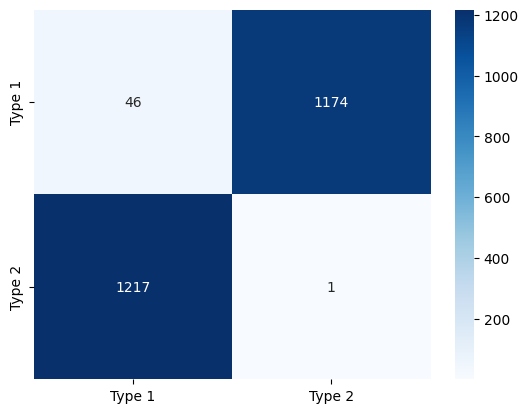

In [140]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_test, y_pred)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[fp, tp], [tn, fn]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Type 1', 'Type 2'], yticklabels=['Type 1', 'Type 2'])

#type 1: I predict a positive (predict a 1) when it should be negative ---> Top left 
#type 2: I predict a negative (predict a 0) when it should be positive ---> Top right

#HeatMap

#Top left: Count of false positive
#Top right: Count of true positive

#Bottom left: Count of true negative
#Bottom right: Count of false negative





### 2.2.2 Linear Discriminant Analisis

El análisis discriminante lineal (LDA) es un algoritmo clásico de clasificación lineal, y su objetivo es encontrar una combinación lineal de características que maximice la separación entre las dos clases (setas comestibles y venenosas). En otras palabras, el LDA intenta proyectar los datos en un espacio de menor dimensión, preservando al mismo tiempo la mayor discriminación de clases posible.

La etiqueta de clase con la media más cercana en el espacio transformado sería la etiqueta de clase predicha para la muestra de setas.

> a) ¿Qué es lo que asume el modelo LDA sobre la distribución condicional de las clases?

> b) ¿Qué es lo que asume el modelo LDA sobre las matrices de covarianza de la distribución condicional?

> c) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

#### Respuestas

a)Asume una distribución Gaussiana Multivariable, con media $\mu \in \mathbb{R}$ y covarianza $\Sigma\in\mathbb{R}^I\text{ x }\mathbb{R}^I$, con $\Sigma \geq 0$

b) Asume que todas matrices de covarianza de la distribución son iguales

c)

In [141]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_repr,y_train)

y_pred_lda = lda.predict(X_test_repr)

print(accuracy_score(y_test,y_pred_lda))

0.9995898277276456


> d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [142]:
report = classification_report(y_test, y_pred, target_names=['edible','poisonous'])

# Print the classification report
print(report)


              precision    recall  f1-score   support

      edible       1.00      0.96      0.98      1263
   poisonous       0.96      1.00      0.98      1175

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



> e) Muestre los errores tipo 1 y tipo 2.

<Axes: >

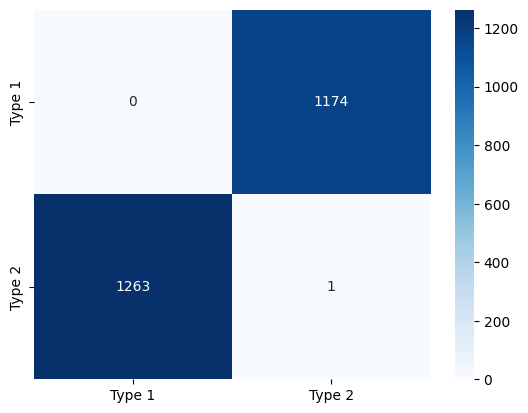

In [143]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_test, y_pred_lda)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[fp, tp], [tn, fn]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Type 1', 'Type 2'], yticklabels=['Type 1', 'Type 2'])


### 2.2.3 Regresión logística

La regresión logística es un modelo discriminativo de clasificación clásico que puede utilizarse para la clasificación de hongos. El objetivo de la regresión logística es encontrar el modelo lineal que mejor se ajuste y que pueda predecir la probabilidad de que cada muestra de hongo pertenezca a una clase determinada (comestible o venenosa).

> a) ¿En qué consiste la estimación de máxima verosimilitud de coeficientes?

> b) ¿Qué asume este modelo de la relación entre las características y la variable objetivo?

> c) ¿Qué se hace para evitar el sobreajuste de este modelo?

> d) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

**Nota:** Usted puede variar o probar con distintos hiperparámetros siempre y cuando se utilizen de forma correcta el modelo y los datos para que pueda obtener predicciones comparables con los otros modelos. Puede basarse en los hiperparámetros probados con el regresor logistico y en la documentación de la librería.

a) Se trata de lograr una estimación que logre maximizar la función de verosimilitud, es decir, encontrar los coeficientes que logren que los datos observados sean más probables dado el modelo a utilizar.

b) Supone una frontera de decisión en la clasificación del tipo lineal.

c) Es posible utilizar métodos de regularización, cross-validation o métodos de selección de features (PCA, FLD)

d)


In [144]:
lgr = LogisticRegression()
#Training the model
lgr.fit(X_train_repr,y_train)

# Make predictions on the test set
y_pred_lgr = lgr.predict(X_test_repr)

print(accuracy_score(y_test,y_pred_lgr))


1.0


> e) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [145]:
# Generate the classification report
report_lgr = classification_report(y_test, y_pred, target_names=['edible','poisonous'])

# Print the classification report
print(report)


              precision    recall  f1-score   support

      edible       1.00      0.96      0.98      1263
   poisonous       0.96      1.00      0.98      1175

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



> f) Muestre los errores tipo 1 y tipo 2.

<Axes: >

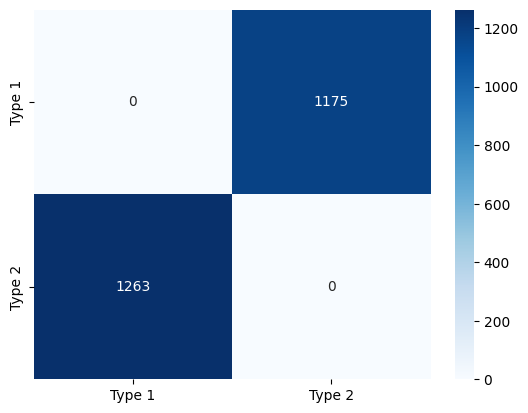

In [146]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_test, y_pred_lgr)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[fp, tp], [tn, fn]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Type 1', 'Type 2'], yticklabels=['Type 1', 'Type 2'])


### 2.2.4 Support Vector Machines

Las máquinas de vectores soporte (SVM) son un algoritmo de aprendizaje automático potente y versátil que puede utilizarse para la clasificación de hongos. La idea principal detrás de SVM es encontrar el hiperplano que mejor separa las diferentes clases en el conjunto de datos.

Utilice los datos de entrenamiento para ajustar un modelo SVM a los datos. Esto implica encontrar el hiperplano que maximice el margen entre las muestras positivas y negativas. El margen es la distancia entre el hiperplano y las muestras más cercanas de cada clase.

Si los datos no se pueden separar linealmente, utilice funciones de kernel para transformar los datos en un espacio de mayor dimensión en el que se puedan separar. Las funciones kernel más comunes incluyen funciones polinómicas, de base radial (RBF) y sigmoidales.

Entrene un clasificador SVM con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

Entrene el clasificador con los siguientes tipos de _kernel_:

> a) Lineal, con 2 valores del coeficiente gamma distintos.

> b) Polinómico, con 2 valores del coeficiente gamma distintos.

> c) rbf, con 2 valores del coeficiente gamma distintos.

In [147]:
svmrbf = NuSVC(kernel='rbf', gamma=0.9)
svmrbf.fit(X_train_repr,y_train)

y_pred_svm_rbf = svmrbf.predict(X_test_repr)
# print(accuracy_score(y_test,y_pred_svm_r))

# setting the gammas
gamma_1 = 0.4
gamma_2 = 0.9
# Define the different representations with their names or hyperparameters
representations = {
    'SVM_alpha_'+str(gamma_1): NuSVC(gamma=gamma_1),
    'SVM_alpha_'+str(gamma_2): NuSVC(gamma=gamma_2),
    'SVM_linear_'+str(gamma_1): NuSVC(kernel='linear', gamma=gamma_1),
    'SVM_linear_'+str(gamma_2): NuSVC(kernel='linear', gamma=gamma_2),
    'SVM_poly_'+str(gamma_1): NuSVC(kernel='poly', gamma=gamma_1),
    'SVM_poly_'+str(gamma_2): NuSVC(kernel='poly', gamma=gamma_2),
    'SVM_rbf_'+str(gamma_1): NuSVC(kernel='rbf', gamma=gamma_1),
    'SVM_rbf_'+str(gamma_2): NuSVC(kernel='rbf', gamma=gamma_2),
}
results_table =pd.DataFrame()
results_table = pd.DataFrame(columns=['Representation', 'Accuracy'])

# Prepare a list to store the results
results_acurracy = []
# report = []
results_reports = pd.DataFrame()


# Iterate over the representations and train/evaluate the models
for rep_name, model in representations.items():
    # Train the model
    model.fit(X_train_repr, y_train)
    
    # Make predictions on the test set
    y_pred_ = model.predict(X_test_repr)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_)
    results_acurracy.append({'Representation': rep_name, 'Accuracy': accuracy})

    # Calculate classification report
    report = classification_report(y_test, y_pred_, target_names=['edible', 'poisonous'], output_dict=True)
    report_fin = pd.DataFrame(report).transpose()
    report_fin['SVC'] = rep_name
    results_reports = pd.concat([results_reports,report_fin])
    # Add results to the lists
    results_reports = pd.concat([results_reports,report_fin])
    
# Create a DataFrame for accuracy results
results_table = pd.DataFrame(results_acurracy)

# Sort the table based on accuracy (descending order)
results_table = results_table.sort_values('Accuracy', ascending=False)

# Print the results table
print(results_table)


   Representation  Accuracy
1   SVM_alpha_0.9  1.000000
7     SVM_rbf_0.9  1.000000
0   SVM_alpha_0.4  0.997949
6     SVM_rbf_0.4  0.997949
4    SVM_poly_0.4  0.937654
5    SVM_poly_0.9  0.937654
2  SVM_linear_0.4  0.907301
3  SVM_linear_0.9  0.907301


> d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [148]:
# # Reset the index of the DataFrame
results_reports.reset_index(inplace=True)
results_reports.rename(columns={'index': 'Class'}, inplace=True)

# Reorder the columns
columns_order = ['SVC', 'Class', 'precision', 'recall', 'f1-score', 'support']
results_reports = results_reports[columns_order]

# Print the DataFrame
print(results_reports)

              SVC         Class  precision    recall  f1-score      support
0   SVM_alpha_0.4        edible   0.996057  1.000000  0.998024  1263.000000
1   SVM_alpha_0.4     poisonous   1.000000  0.995745  0.997868  1175.000000
2   SVM_alpha_0.4      accuracy   0.997949  0.997949  0.997949     0.997949
3   SVM_alpha_0.4     macro avg   0.998028  0.997872  0.997946  2438.000000
4   SVM_alpha_0.4  weighted avg   0.997957  0.997949  0.997949  2438.000000
..            ...           ...        ...       ...       ...          ...
75    SVM_rbf_0.9        edible   1.000000  1.000000  1.000000  1263.000000
76    SVM_rbf_0.9     poisonous   1.000000  1.000000  1.000000  1175.000000
77    SVM_rbf_0.9      accuracy   1.000000  1.000000  1.000000     1.000000
78    SVM_rbf_0.9     macro avg   1.000000  1.000000  1.000000  2438.000000
79    SVM_rbf_0.9  weighted avg   1.000000  1.000000  1.000000  2438.000000

[80 rows x 6 columns]


> e) Muestre los errores tipo 1 y tipo 2.

<Axes: >

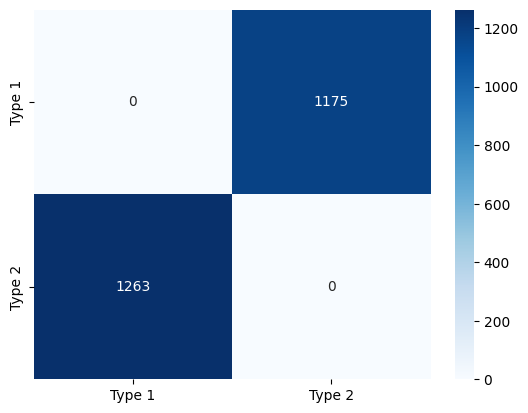

In [149]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_test, y_pred_svm_rbf)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[fp, tp], [tn, fn]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Type 1', 'Type 2'], yticklabels=['Type 1', 'Type 2'])


## 2.3 Conclusiones:

En machine learning es importante estudiar los datos antes de empzar a construir el modelo. Es por esto, que en este caso particular, antes de comenzar a trabajar con los distintos modelos de clasificación se transforman los datos de entrada a variables binarias y se construyen distintos conjuntos de entrenamiento y prueba utilizando técnicas para disminuir la dimensionalidad de los datos, tales como PCA y mutual information.

Dado que es un problema de clasificación donde se busca predecir si un hongo es comestible o venoso, se selecciona como métrica para estudiar el desempeño de los distintos conjuntos el _recall_ de la clase poisonous, pues es importante que el modelo tenga una baja tasa de error al momento de predecir esa clase.

Utilizando el modelo de clasificación de Naive Bayes se seleccionó el conjunto de datos al cual se le eliminaron 10  _features_, específicamente las que mostraron ser menos representativa según los valores de mutual information. Se esperaría que con este conjunto se logre una mejor representación y predicción correcta de la clase venenosa. Pero es importante destacar que todos los conjuntos de datos obtuvieron un _recall_ alto (en ambas clases), siendo para varios exacatamente 1. Sin embargo, esto, en algunos modelos de entrenamiento, resultó ser a costa de la presición en la clase comestible.

Finalmente, con el conjunto representativo se estudiaron los modelos de clasificación LDA, regresión logística y SVM. En los tres modelos se presentaron resultados aceptables, con altos niveles de _accuracy_ y con baja predicción de falsos positivos y falsos negativos (errores tipo 1 y 2), al nivel de lograr una predicción sin error en conjunto de validación.


